In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/hf-py310/bin/python


In [11]:
# pandas, numpy, matplotlib, jupyter, ipywidgets, tqdm Îì± ÌïúÍ∫ºÎ≤àÏóê ÏÑ§Ïπò
!pip install pandas numpy matplotlib jupyter ipywidgets tqdm


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.3/11.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.0/8.0 MB 713.2 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 404.6 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [17]:
from konlpy.tag._mecab import Mecab
print("Mecab Î∂àÎü¨Ïò§Í∏∞ ÏÑ±Í≥µ!")

ModuleNotFoundError: No module named 'konlpy'

In [19]:
from konlpy.tag import Mecab

mecab = Mecab()

print(mecab.morphs("Ïù¥Ï†ú ÏßÑÏßú ÎêòÎäîÏßÄ ÌÖåÏä§Ìä∏Ìï¥Î≥¥Ïûê"))


ModuleNotFoundError: No module named 'konlpy'

In [75]:
dir_ = "/Users/sohyeonserenryu/Library/CloudStorage/Box-Box/!Sohyeon 2025_Box/ACE 592 SAE/grpup project/"

In [77]:
import pandas as pd

df_tariff = pd.read_csv("tariff_comments.csv", encoding='utf-8')

In [79]:
df_tariff.columns

Index(['video_id', 'comment_type', 'parent_id', 'comment_id', 'author', 'text',
       'published_at', 'like_count'],
      dtype='object')

/var/folders/9g/4ckvsl7x1p34ttfd90yh0m0h0000gn/T/ipykernel_63510/1867454077.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_tariff['minute'] = df_tariff['published_at'].dt.floor('T')


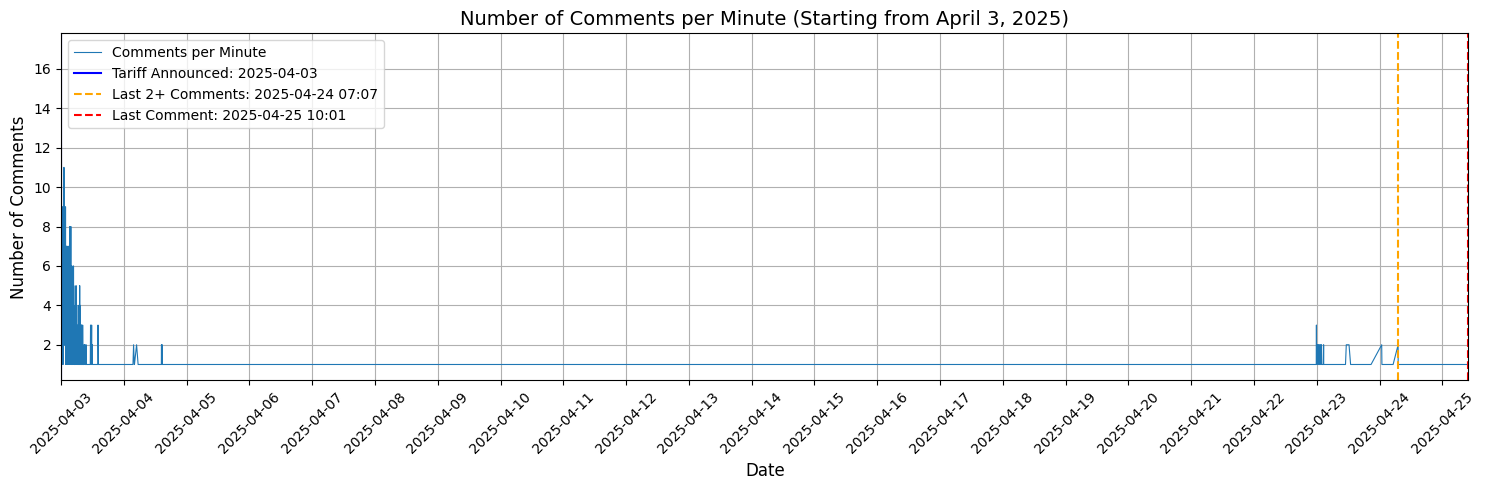

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_tariff['published_at'] = pd.to_datetime(df_tariff['published_at'], errors='coerce')
df_tariff['minute'] = df_tariff['published_at'].dt.floor('T')
comments_per_minute = df_tariff.groupby('minute').size().reset_index(name='comment_count')

# Í∏∞Ï§Ä ÏãúÏ†êÎì§
start_time = pd.Timestamp('2025-04-03', tz='UTC')
end_time = df_tariff['minute'].max()
last_2plus = comments_per_minute[comments_per_minute['comment_count'] >= 2]['minute'].max()

# ÏãúÍ∞ÅÌôî ÏãúÏûë
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(comments_per_minute['minute'], comments_per_minute['comment_count'], linewidth=0.8, label='Comments per Minute')

# xÏ∂ï ÏÑ§Ï†ï: ÌïòÎ£® Í∞ÑÍ≤© + ÎÇ†Ïßú Ìè¨Îß∑
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# xÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
ax.set_xlim([start_time, end_time])

# üîµ ÌäπÏ†ï ÎÇ†Ïßú Í∞ïÏ†ú ÌëúÏãú (Ïòà: 4Ïõî 3Ïùº)
xticks = list(ax.get_xticks())
xticks.append(mdates.date2num(start_time))
ax.set_xticks(sorted(set(xticks)))

# xÏ∂ï Î†àÏù¥Î∏î ÌöåÏ†Ñ
plt.xticks(rotation=45)

# Ï£ºÏöî ÏãúÏ†ê ÏÑ† Ï∂îÍ∞Ä
ax.axvline(start_time, color='blue', linestyle='-', label='Tariff Announced: 2025-04-03')
ax.axvline(last_2plus, color='orange', linestyle='--', label=f'Last 2+ Comments: {last_2plus.strftime("%Y-%m-%d %H:%M")}')
ax.axvline(end_time, color='red', linestyle='--', label=f'Last Comment: {end_time.strftime("%Y-%m-%d %H:%M")}')

# Ï†úÎ™©, ÎùºÎ≤®, Î≤îÎ°Ä, Í≤©Ïûê
ax.set_title('Number of Comments per Minute (Starting from April 3, 2025)', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Comments', fontsize=12)
ax.legend()
ax.grid(True)

# Î†àÏù¥ÏïÑÏõÉ ÏµúÏ†ÅÌôî
plt.tight_layout()
plt.show()


In [83]:
# Í∏∞Í∞Ñ ÏÑ§Ï†ï: 4Ïõî 3Ïùº~ 4Ïõî 4Ïùº (UTC)
start = pd.Timestamp('2025-04-03', tz='UTC')
end = pd.Timestamp('2025-04-04 23:59:59', tz='UTC')

# Í∏∞Í∞Ñ ÎÇ¥ ÎåìÍ∏Ä ÌïÑÌÑ∞ÎßÅ
df_in_period = df_tariff[(df_tariff['published_at'] >= start) & (df_tariff['published_at'] <= end)]

# Í≤∞Í≥º Í≥ÑÏÇ∞
count_in_period = df_in_period.shape[0]
total_count = df_tariff.shape[0]
percentage = (count_in_period / total_count) * 100

print(f"üóìÔ∏è 2025-04-03 ~ 2025-04-04 Í∏∞Í∞Ñ ÎåìÍ∏Ä Ïàò: {count_in_period:,}Í∞ú")
print(f"üìä Ï†ÑÏ≤¥ ÎåìÍ∏Ä Ï§ë ÎπÑÏ§ë: {percentage:.2f}%")

üóìÔ∏è 2025-04-03 ~ 2025-04-04 Í∏∞Í∞Ñ ÎåìÍ∏Ä Ïàò: 1,431Í∞ú
üìä Ï†ÑÏ≤¥ ÎåìÍ∏Ä Ï§ë ÎπÑÏ§ë: 63.63%


In [85]:
!pip install transformers sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
!pip install torch

In [35]:
!pip install torch torchvision torchaudio

In [37]:
!which python

/opt/anaconda3/envs/hf-py310/bin/python


In [87]:
from transformers import pipeline

# Í∞êÏÑ± Î∂ÑÏÑù ÌååÏù¥ÌîÑÎùºÏù∏ Î°úÎìú
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# ÏòàÏãú Î¨∏Ïû• Î∂ÑÏÑù
result = classifier("Ïù¥ Ï†úÌíà Ï†ïÎßê Ï¢ãÏïÑÏöî!")
print(result)

Device set to use mps:0


[{'label': 'LABEL_1', 'score': 0.9905368685722351}]


In [89]:
from transformers import pipeline

# ÌååÏù¥ÌîÑÎùºÏù∏ Î°úÎìú
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def get_sentiment_score(text):
    try:
        result = classifier(text[:512])[0]
        score = result['score']
        label = result['label']
        if label == 'LABEL_1':  # Í∏çÏ†ï
            return score
        else:  # Î∂ÄÏ†ï
            return -score
    except:
        return None

# ÏòàÏãú
print(get_sentiment_score("Ïù¥ Ï†úÌíà Ï†ïÎßê Ï¢ãÏïÑÏöî!"))    # ‚Üí 0.99 (Í∏çÏ†ï)
print(get_sentiment_score("Î≥ÑÎ°úÏòÄÏñ¥Ïöî. Îã§ÏãúÎäî Ïïà ÏÇ¥ÎûòÏöî."))  # ‚Üí -0.98 (Î∂ÄÏ†ï)

Device set to use mps:0


0.9905368685722351
-0.997114896774292


In [91]:
from tqdm.notebook import tqdm

# ÌååÏù¥ÌîÑÎùºÏù∏ Î°úÎìú
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# tqdm Ï†ÅÏö©ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï (ÏßÑÌñâÎ•† ÌëúÏãú)
tqdm.pandas()

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def get_sentiment_score(text):
    try:
        result = classifier(text[:512])[0]
        score = result['score']
        label = result['label']
        return score if label == 'LABEL_1' else -score
    except:
        return None

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ï†ÅÏö© (ÏãúÍ∞Ñ Í±∏Î¶¥ Ïàò ÏûàÏùå)
df_tariff['sentiment_score'] = df_tariff['text'].progress_apply(get_sentiment_score)

Device set to use mps:0


  0%|          | 0/2249 [00:00<?, ?it/s]

In [66]:
!pip install konlpy wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 584.5/584.5 kB 1.4 MB/s eta 0:00:00-:--:--
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.1/8.1 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4/4 [wordcloud]


In [95]:
from konlpy.tag import Okt

okt = Okt(jvmpath="/opt/homebrew/opt/openjdk/libexec/openjdk.jdk/Contents/Home/lib/server/libjvm.dylib")

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# Î™®Îì† ÎåìÍ∏Ä Ìï©ÏπòÍ∏∞
all_text = " ".join(df_tariff['text'].dropna().astype(str).tolist())

# Î™ÖÏÇ¨ Ï∂îÏ∂ú
nouns = okt.nouns(all_text)

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (ÏòàÏãú: Ï°∞ÏÇ¨, Í∞êÌÉÑÏÇ¨ Îì±)
stopwords = ['Í≤É', 'Í±∞', 'Ï¢Ä', 'Îçî', 'Ï†Ä', 'ÎÇò', 'Ïù¥', 'Îì±', 'Ïàò', 'Í∑∏', 'Îïå', 'Ïûà', 'ÏûàÎã§']
words_filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ Ï∂îÏ∂ú
word_counts = Counter(words_filtered)
top10 = word_counts.most_common(10)

print("üìå ÏÉÅÏúÑ 10Í∞ú ÏûêÏ£º Îì±Ïû•Ìïú Îã®Ïñ¥:")
for word, count in top10:
    print(f"{word}: {count}Ìöå")

üìå ÏÉÅÏúÑ 10Í∞ú ÏûêÏ£º Îì±Ïû•Ìïú Îã®Ïñ¥:
ÎØ∏Íµ≠: 856Ìöå
Í¥ÄÏÑ∏: 439Ìöå
ÌïúÍµ≠: 303Ìöå
Ìä∏ÎüºÌîÑ: 272Ìöå
Ï§ëÍµ≠: 253Ìöå
ÎÇòÎùº: 211Ìöå
Ïö∞Î¶¨: 184Ìöå
Íµ≠Í∞Ä: 116Ìöå
Ïö∞Î¶¨ÎÇòÎùº: 101Ìöå
ÏàòÏ∂ú: 96Ìöå


In [103]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÏÇ¨Ïö©Ìï† ÌïúÍ∏Ä Ìè∞Ìä∏ Ïù¥Î¶Ñ
font_name = 'AppleGothic'  # ÎòêÎäî 'Apple SD Gothic Neo'

# matplotlib Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family=font_name)

# ÏùåÏàò Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False



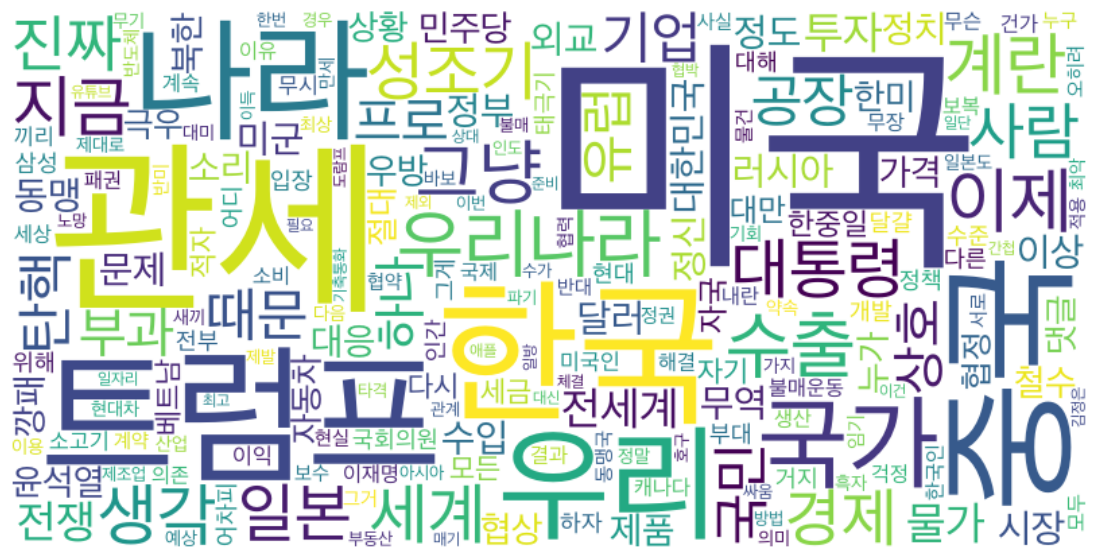

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=400)
wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [109]:
# ÌÖçÏä§Ìä∏ Ï∂úÎ†• Ï†úÌïú Ìï¥Ï†ú
pd.set_option('display.max_colwidth', None)

# Í∏çÏ†ï ÏÉÅÏúÑ 10Í∞ú, Î∂ÄÏ†ï ÏÉÅÏúÑ 10Í∞ú Ï†ïÎ†¨
top_positive = df_tariff.sort_values(by='sentiment_score', ascending=False).head(10)
top_negative = df_tariff.sort_values(by='sentiment_score', ascending=True).head(10)

# Í≤∞Ìï©Ìï¥ÏÑú ÌôïÏù∏
result = pd.concat([
    top_positive[['text', 'sentiment_score']],
    top_negative[['text', 'sentiment_score']]
])

# Ï∂úÎ†•
result

text  \
112                                                                                                           Ïù¥Ï∞∏Ïóê Ïö∞Î¶¨ÎèÑ Î¨ºÍ∞ÄÎÇò ÌôïÏã§Ìûà Ïû°Í≥† Íµ¨Ï°∞Ï°∞Ï†ï Ïûò Ìï¥ÏÑú Îã§Ïùå ÏÉÅÏäπ ÏÇ¨Ïù¥ÌÅ¥ Ïò¨ÎùºÌÉà Ï§ÄÎπÑÎÇò ÌïòÏûê   
314                                                                                                          Îã¨Îü¨ Î¨¥ÌïúÎåÄ Ï∞çÏñ¥ÎÇ¥ÏÑú Î®πÍ≥† ÏÇ¥ÏïÑÍ∞ÄÎäî ÎÜàÎì§Ïù¥...<br>ÎãàÎì§Íµ≠Í∞ÄÎÇ¥ÏóêÏÑú ÏûêÍ∏âÏûêÏ°±ÌïòÍ≥† ÏÇ¥ÏïÑÍ∞ÄÎùº.   
1370                                      Ïûê Ïù¥Ï†ú ÎØºÏ£ºÎãπÏù¥ Ï†ïÍ∂å Ï•êÎ©¥ ÏôÑÎ≤ΩÌïú Í∑∏Î¶ºÏù¥ Í∑∏Î†§ÏßÄÍ≤†Íµ∞ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã ÏßÄÍ∏àÍπåÏßÄ ÌïúÍµ≠ ÏÑúÎ≤ÑÎ•º Ïù¥Ïö©Ìï¥Ï£ºÏã† Ïó¨Îü¨Î∂Ñ Í∞êÏÇ¨Ìï©ÎãàÎã§. Ï°∞ÏÑ†Ï°± ÏÑúÎ≤ÑÎ°ú Îã§Ïãú Î¶¨Ïò§ÌîàÌï† ÏòàÏ†ïÏù¥Îãà Í∏∞ÎåÄ Ìï¥Ï£ºÏãúÍ∏∏ Î∞îÎûòÏöî. „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
393                                                                                                                            ÎØ∏Íµ≠  Ï¢ãÎã§Í≥†  ÎìúÎüΩÍ≤å Îπ®ÏïÑÎåÄÎçò ÏïÑÏä§ÌåîÌä∏ Íº¥ÌÜµÎì§ Î™®ÌïòÎÉê !   
713   Îã¨Î†§Îùº Îã¨Î†§ Î°úÎ≥¥Ìä∏Ïïº ÎÇ†ÏïÑÎùº ÎÇ†ÏïÑ ÌÉúÍ∂åÎ∏åÏù¥\r<br>Ï†ïÏùòÎ°ú Î≠âÏπú Ï£ºÎ®π Î°úÎ≥¥Ìä∏ ÌÉúÍ∂å\r<br>Ïö©Í∞êÌïòÍ≥† Ïî©Ïî©Ìïú Ïö∞Î¶¨Ïùò ÏπúÍµ¨\r<br>\r<br>Îëê ÌåîÏùÑ Í≥ßÍ≤å ÏïûÏúºÎ°ú ÎªóÏñ¥\r<br>ÎüºÌîÑÏùÑ Ìñ•Ìï¥ ÌïòÎäò ÎÇ†ÏúºÎ©¥\r<br>Î©ãÏßÄÎã§ Ïã†ÎÇúÎã§ ÌÉúÍ∂åÎ∏åÏù¥ ÎßåÎßåÏÑ∏\r<br>Î¨¥Ï†ÅÏùò Ïö∞Î¶¨ ÏπúÍµ¨ ÌÉúÍ∂åÎ∏åÏù¥   
708                                                                                                                  Í∞êÏÇ¨Ìï©ÎãàÎã§. Ìä∏Ìô©. ÌïúÏø° ÍπÄÏπò Ïûò Î∂ÄÌÉÅ ÎìúÎ¶ΩÎãàÎã§. Í¥ÄÏÑ∏ Îçî ÎïåÎ†§ÎèÑ Ï¢ãÏäµÎãàÎã§.   
1674                                                                                                                                           ÏÜêÏò§Í≥µ Ï†ÑÌà¨Î†•Î≥¥Îã§ ÏûòÏò¨ÎùºÍ∞ÄÎÑ§!   
627                                                                                                           Ïö∞Î¶¨ÎÇòÎùº Í≤ΩÏ†úÏù∏Îì§ Ìä∏ÎüºÌîÑ ÏßÄÏßÄÌïú Ïù∏Í∞ÑÎì§ ÎßéÏïòÏßÄ ~  <br>ÌäπÌûà, Ïã†ÏÑ∏Í≥ÑÍ∑∏Î£π Ï†ïÏö©ÏßÑ!!!   
670                                                                                       Ïú†ÎüΩ Ï§ëÏùºÏù¥Îûë Ìï®ÍªòÌï†Í≤å Í≥†ÎßôÎã§ ÌÜ†ÎûåÌîÑüòÖ Îπ®Î¶¨ Îã§Ïù¥Ìï¥Îùº<br>Î∞±Î∞∞Î°ú ÌïòÎÇòÎê†Íªò we are the one üåéü§ùüèªüá∞üá∑ü§ùüèªüáØüáµü§ùüèªüåç   
1728                                                                                                                                              ÍµøÍµø Ïù¥Í±∞ÏßÄ „Öã„Öã„Öã„Öã„Öã„Öã   
1134                                                                                     Ìä∏ÎüºÌîÑÏùò ÏßÄÍ∏à ÏàòÍ∞Ä ÎØ∏Íµ≠ Í≤ΩÏ†úÏùò ÏµúÏïÖÏùò ÏàòÍ∞Ä Îê† Í≤ÉÏù¥Îã§. ÎØ∏Íµ≠ÏùÑ Îçî Í∑πÏã¨Ìïú ÏñëÍ∑πÌôîÎ°ú Î™∞ÏïÑ Í∞à Í≤ÉÏù¥Í≥†, ÏµúÏïÖÏùò ÏµúÏïÖÏù¥ Îê† Í≤ÉÏûÑ.   
1414                                                                                                                    ÌùîÎì§ÎïåÏûÑ ÏïÑÏãúÏïÑ Îã®Í≤∞ÏïàÌïòÎ©¥ Í∞úÎöúÎìúÎ†§ÎßûÍ≥† Ï£ºÏöîÏÇ∞ÏóÖÏóê ÎÜçÏóÖÎßàÏ†Ä Îã§ÎßùÍ∞ÄÏßàÌåêÏûÑ   
1864                                     600ÎßåÎ™ÖÎ∂Ñ ÎßàÏïΩÏùÑ ÌïúÍµ≠ Í≤ΩÏú†Ìï¥ ÎØ∏Íµ≠ÏúºÎ°ú Î≥¥ÎÇ¥Î†§Í≥† ÌñàÎã§Î©∞?.. Ï§ëÍ≥µÏùò ÎßàÏïΩ Ï§ëÍ∞úÏù∏Ïù¥ ÎêòÏñ¥Î≤ÑÎ¶∞ ÌïúÍµ≠Ïù∏Îç∞.. Í¥ÄÏÑ∏ Ïïà ÎïåÎ¶¨Í≤å ÏÉùÍ≤ºÎÉê? ÎßàÏïΩÏàòÏÇ¨ Î∞©Ìï¥ÌïòÍ≥†, Í¥ÄÎ†®ÏòàÏÉÅ Ï†ÑÏï° ÏÇ≠Í∞êÌïú ÎçîÎ∂àÏñ¥Ï§ëÍ≥µÎãπ Ï†ÑÎ∂Ä Ïù¥Ï†ÅÏ£ÑÎ°ú Ï≤¥Ìè¨ ÏàòÏÇ¨ÌïòÎùº   
769                                                                     Ìä∏ÎüºÌîÑÍ∞Ä Ï†ïÏã†Ïù¥ ÎÇòÍ∞îÎÑ§..<br>Ï†Ñ ÏÑ∏Í≥ÑÎ•º ÏÉÅÎåÄÎ°ú ÎèÖÏû¨ Ïô∏ÍµêÎ•º ÌïòÎ†§Í≥† ÌïòÎÑ§.. Ï†ÄÍ≤å ÎèÖÏû¨Ïûê ÏïÑÎãàÎÉê? Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ï†ÑÎ∂Ä ÏÜê Ïû°Í≥† ÎØ∏Íµ≠Í≥º Ïã∏ÏõåÏïº ÌïòÎäî Í±∞ ÏïÑÎãåÍ∞Ä?   
2077                                                ÎÇòÎùºÍ∞Ä 25% Í¥ÄÏÑ∏Î•º Î∂ÄÍ≥ºÎ∞õÎäî Ïã¨Í∞ÅÌïú ÏÉÅÌô©Ïù∏Îç∞, ÎåìÍ∏ÄÏóêÏÑú Í≥ÑÎûÄ ÌÉÄÎ†πÏù¥ÎÇò ÌïòÍ≥† ÏûàÎÑ§.. ÏÉùÍ∞ÅÌïòÎäî ÏàòÏ§Ä ÎÑàÎ¨¥ Îñ®Ïñ¥Ïßê..<br>Íµ≠ÎØºÎì§Ïù¥ Ïù¥ Ï†ïÎèÑ ÏàòÏ§ÄÎ∞ñÏóê Ïïà ÎêòÎãàÍπå 25ÌçºÏÑºÌä∏ Í¥ÄÏÑ∏ Î¨ºÎ¶¨ÏßÄ<br>ÏóêÌú¥   
1095                                                                                           ÏÑ±Ï°∞Í∏∞ ÎßàÏù¥ ÌùîÎì§Ïñ¥ „Öã„Öã<br>ÎØ∏Íµ≠ ÏûÖÏû•ÏóêÏÑ† ÏïÑÎ¨¥ ÎèÑÏõÄÎèÑ Ï

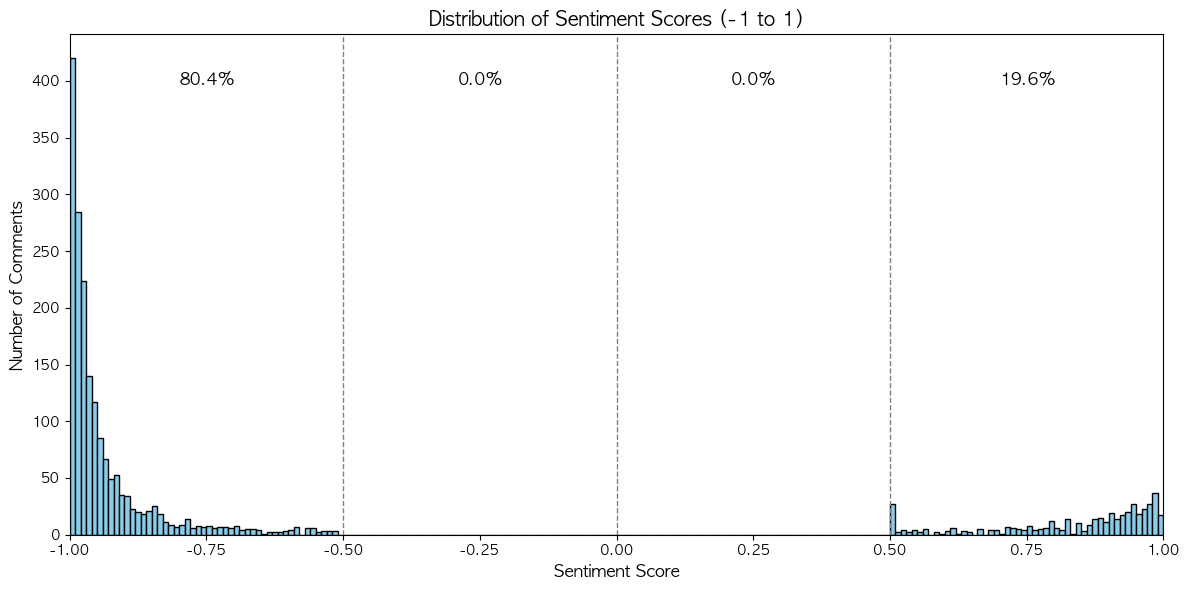

In [111]:
import numpy as np

# NaN Ï†úÍ±∞
sentiment_scores = df_tariff['sentiment_score'].dropna()

# Íµ¨Í∞Ñ Ï†ïÏùò
bins = np.arange(-1, 1.01, 0.01)
ranges = [(-1.0, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 1.0)]
range_labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
total = len(sentiment_scores)

# Í∞Å Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
range_counts = [(sentiment_scores[(sentiment_scores > low) & (sentiment_scores <= high)].count()) for (low, high) in ranges]
range_percents = [f"{count/total*100:.1f}%" for count in range_counts]

# ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(12, 6))
plt.hist(sentiment_scores, bins=bins, edgecolor='black', color='skyblue')
plt.xlim([-1, 1])
plt.title('Distribution of Sentiment Scores (-1 to 1)', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.grid(False)

# ÏÑ∏Î°úÏÑ†: Íµ¨Î∂ÑÏÑ† Ï∂îÍ∞Ä
for x in [-0.5, 0, 0.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# ÌÖçÏä§Ìä∏ ÎπÑÏú® ÌëúÏãú
x_positions = [-0.75, -0.25, 0.25, 0.75]
for i, x in enumerate(x_positions):
    plt.text(x, plt.ylim()[1]*0.9, range_percents[i], ha='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [113]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model_name = "nlp04/korean_sentiment_analysis_kcelectra"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Í∞êÏÑ± Î∂ÑÏÑù ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

Device set to use mps:0


In [115]:
def get_sentiment_label(text):
    try:
        result = classifier(text[:512])[0]
        return result['label']
    except:
        return None

# Í∞êÏÑ± Î∂ÑÏÑù Ï†ÅÏö©
df_tariff['sentiment_label'] = df_tariff['text'].apply(get_sentiment_label)

In [117]:
# Í∞êÏÑ± ÎùºÎ≤® ‚Üí Ïà´Ïûê Îß§Ìïë
label_map = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

# Ïà´ÏûêÌòï Ï†êÏàò Ïó¥ Ï∂îÍ∞Ä
df_tariff['sentiment_numeric'] = df_tariff['sentiment_label'].map(label_map)

In [119]:
# NaN Ï†úÏô∏Ìïú Í∞íÏúºÎ°ú ÏßëÍ≥Ñ
sentiment_min = df_tariff['sentiment_numeric'].min()
sentiment_max = df_tariff['sentiment_numeric'].max()
sentiment_mean = df_tariff['sentiment_numeric'].mean()

print(f"üìâ ÏµúÏÜåÍ∞í (Min): {sentiment_min}")
print(f"üìà ÏµúÎåÄÍ∞í (Max): {sentiment_max}")
print(f"üìä ÌèâÍ∑†Í∞í (Mean): {sentiment_mean:.3f}")

üìâ ÏµúÏÜåÍ∞í (Min): nan
üìà ÏµúÎåÄÍ∞í (Max): nan
üìä ÌèâÍ∑†Í∞í (Mean): nan


In [121]:
df_tariff['sentiment_label'].value_counts(dropna=False)

sentiment_label
ÏßúÏ¶ùÎÇ®           1532
Ïä¨Ìîî(Ïö∞Ïö∏Ìïú)        275
ÏùºÏÉÅÏ†ÅÏù∏           205
Ï¶êÍ±∞Ïö¥(Ïã†ÎÇòÎäî)        90
Í±±Ï†ïÏä§Îü¨Ïö¥(Î∂àÏïàÌïú)      61
ÏÉùÍ∞ÅÏù¥ ÎßéÏùÄ          28
Í∏∞ÏÅ®(ÌñâÎ≥µÌïú)         28
ÏÑ§Î†àÎäî(Í∏∞ÎåÄÌïòÎäî)       21
Í≥†ÎßàÏö¥              8
ÏÇ¨ÎûëÌïòÎäî             1
Name: count, dtype: int64

In [123]:
label_score_map = {
    'ÏßúÏ¶ùÎÇ®': -1,
    'Ïä¨Ìîî(Ïö∞Ïö∏Ìïú)': -0.8,
    'Í±±Ï†ïÏä§Îü¨Ïö¥(Î∂àÏïàÌïú)': -0.6,
    'ÌûòÎì¶(ÏßÄÏπ®)': -0.6,
    'ÏÉùÍ∞ÅÏù¥ ÎßéÏùÄ': -0.3,
    'ÏùºÏÉÅÏ†ÅÏù∏': 0,
    'ÏÑ§Î†àÎäî(Í∏∞ÎåÄÌïòÎäî)': 0.4,
    'Í∏∞ÏÅ®(ÌñâÎ≥µÌïú)': 0.6,
    'Í≥†ÎßàÏö¥': 0.8,
    'Ï¶êÍ±∞Ïö¥(Ïã†ÎÇòÎäî)': 1,
    'ÏÇ¨ÎûëÌïòÎäî': 1
}

In [129]:
# Í∞êÏ†ï Ï†êÏàò Îß§Ìïë
df_tariff['sentiment_score'] = df_tariff['sentiment_label'].map(label_score_map)

# ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
sentiment_min = df_tariff['sentiment_score'].min()
sentiment_max = df_tariff['sentiment_score'].max()
sentiment_mean = df_tariff['sentiment_score'].mean()

print(f"üìâ ÏµúÏÜåÍ∞í (Min): {sentiment_min}")
print(f"üìà ÏµúÎåÄÍ∞í (Max): {sentiment_max}")
print(f"üìä ÌèâÍ∑†Í∞í (Mean): {sentiment_mean:.3f}")

üìâ ÏµúÏÜåÍ∞í (Min): -1.0
üìà ÏµúÎåÄÍ∞í (Max): 1.0
üìä ÌèâÍ∑†Í∞í (Mean): -0.745


In [131]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
model_name = "nlp04/korean_sentiment_analysis_kcelectra"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [133]:
import pandas as pd

def get_sentiment_score(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1).squeeze().tolist()
        p_neg, p_neu, p_pos = probs
        sentiment_score = -1 * p_neg + 0 * p_neu + 1 * p_pos
        labels = ['negative', 'neutral', 'positive']
        sentiment_label = labels[probs.index(max(probs))]
        return pd.Series([sentiment_label, sentiment_score])
    except Exception as e:
        return pd.Series(['error', None])

In [135]:
sample_texts = [
    "Ïù¥Ï∞∏Ïóê Ïö∞Î¶¨ÎèÑ Î¨ºÍ∞ÄÎÇò ÌôïÏã§Ìûà Ïû°Í≥† Íµ¨Ï°∞Ï°∞Ï†ï Ïûò Ìï¥ÏÑú Îã§Ïùå ÏÉÅÏäπ ÏÇ¨Ïù¥ÌÅ¥ Ïò¨ÎùºÌÉà Ï§ÄÎπÑÎÇò ÌïòÏûê",
    "Îã¨Î†§Îùº Îã¨Î†§ Î°úÎ≥¥Ìä∏Ïïº ÎÇ†ÏïÑÎùº ÎÇ†ÏïÑ ÌÉúÍ∂åÎ∏åÏù¥\r<br>Ï†ïÏùòÎ°ú Î≠âÏπú Ï£ºÎ®π Î°úÎ≥¥Ìä∏ ÌÉúÍ∂å\r<br>Ïö©Í∞êÌïòÍ≥† Ïî©Ïî©Ìïú Ïö∞Î¶¨Ïùò ÏπúÍµ¨\r<br>\r<br>Îëê ÌåîÏùÑ Í≥ßÍ≤å ÏïûÏúºÎ°ú ÎªóÏñ¥\r<br>ÎüºÌîÑÏùÑ Ìñ•Ìï¥ ÌïòÎäò ÎÇ†ÏúºÎ©¥\r<br>Î©ãÏßÄÎã§ Ïã†ÎÇúÎã§ ÌÉúÍ∂åÎ∏åÏù¥ ÎßåÎßåÏÑ∏\r<br>Î¨¥Ï†ÅÏùò Ïö∞Î¶¨ ÏπúÍµ¨ ÌÉúÍ∂åÎ∏åÏù¥",
    "ÏÑ±Ï°∞Í∏∞ ÎßàÏù¥ ÌùîÎì§Ïñ¥ „Öã„Öã<br>ÎØ∏Íµ≠ ÏûÖÏû•ÏóêÏÑ† ÏïÑÎ¨¥ ÎèÑÏõÄÎèÑ ÏïàÎêòÎäî Ï†ïÏπòÏ†Å ÏÑ±Ï°∞Í∏∞ ÌùîÎì§Îã§ Ïì∞Î†àÍ∏∞ÌÜµÌñâÏù∏Í±∞ Îã§ ÏïàÎã§ „Öã„Öã„Öã",
    "ÌùîÎì§ÎïåÏûÑ ÏïÑÏãúÏïÑ Îã®Í≤∞ÏïàÌïòÎ©¥ Í∞úÎöúÎìúÎ†§ÎßûÍ≥† Ï£ºÏöîÏÇ∞ÏóÖÏóê ÎÜçÏóÖÎßàÏ†Ä Îã§ÎßùÍ∞ÄÏßàÌåêÏûÑ",
    "ÎØ∏Íµ≠Ïóê ÏàòÏ∂úÌïòÏßÄ ÎßêÍ≥†, ÏàòÏûÖÎèÑ ÌïòÏßÄ ÎßàÎùº, ÏïàÌïòÎ©¥ ÎêòÏßÄ"
]

# Í∞êÏÑ± Î∂ÑÏÑù Ïã§Ìñâ
sample_df = pd.DataFrame(sample_texts, columns=["text"])
sample_df[['sentiment_label', 'sentiment_score']] = sample_df['text'].apply(get_sentiment_score)

# Í≤∞Í≥º Ï∂úÎ†•
print(sample_df)

                                                                                                                                                        text  \
0                                                                                                          Ïù¥Ï∞∏Ïóê Ïö∞Î¶¨ÎèÑ Î¨ºÍ∞ÄÎÇò ÌôïÏã§Ìûà Ïû°Í≥† Íµ¨Ï°∞Ï°∞Ï†ï Ïûò Ìï¥ÏÑú Îã§Ïùå ÏÉÅÏäπ ÏÇ¨Ïù¥ÌÅ¥ Ïò¨ÎùºÌÉà Ï§ÄÎπÑÎÇò ÌïòÏûê   
1  Îã¨Î†§Îùº Îã¨Î†§ Î°úÎ≥¥Ìä∏Ïïº ÎÇ†ÏïÑÎùº ÎÇ†ÏïÑ ÌÉúÍ∂åÎ∏åÏù¥\r<br>Ï†ïÏùòÎ°ú Î≠âÏπú Ï£ºÎ®π Î°úÎ≥¥Ìä∏ ÌÉúÍ∂å\r<br>Ïö©Í∞êÌïòÍ≥† Ïî©Ïî©Ìïú Ïö∞Î¶¨Ïùò ÏπúÍµ¨\r<br>\r<br>Îëê ÌåîÏùÑ Í≥ßÍ≤å ÏïûÏúºÎ°ú ÎªóÏñ¥\r<br>ÎüºÌîÑÏùÑ Ìñ•Ìï¥ ÌïòÎäò ÎÇ†ÏúºÎ©¥\r<br>Î©ãÏßÄÎã§ Ïã†ÎÇúÎã§ ÌÉúÍ∂åÎ∏åÏù¥ ÎßåÎßåÏÑ∏\r<br>Î¨¥Ï†ÅÏùò Ïö∞Î¶¨ ÏπúÍµ¨ ÌÉúÍ∂åÎ∏åÏù¥   
2                                                                                           ÏÑ±Ï°∞Í∏∞ ÎßàÏù¥ ÌùîÎì§Ïñ¥ „Öã„Öã<br>ÎØ∏Íµ≠ ÏûÖÏû•ÏóêÏÑ† ÏïÑÎ¨¥ ÎèÑÏõÄÎèÑ ÏïàÎêòÎäî Ï†ïÏπòÏ†Å ÏÑ±Ï°∞Í∏∞ ÌùîÎì§Îã§ Ïì∞Î†àÍ∏∞ÌÜµÌñâÏù∏Í±∞ Îã§ ÏïàÎã§ „Öã„Öã„Öã   
3                       

In [137]:
# Í∞êÏ†ï ÌÅ¥ÎûòÏä§Î≥Ñ Í∞êÏ†ï Í∑πÏÑ± Ï†êÏàò Ï†ïÏùò (VADER-style)
class_polarity = {
    'ÏßúÏ¶ùÎÇ®': -1.0,
    'Ïä¨Ìîî(Ïö∞Ïö∏Ìïú)': -0.8,
    'Í±±Ï†ïÏä§Îü¨Ïö¥(Î∂àÏïàÌïú)': -0.6,
    'ÌûòÎì¶(ÏßÄÏπ®)': -0.5,
    'ÏÉùÍ∞ÅÏù¥ ÎßéÏùÄ': -0.3,
    'ÏùºÏÉÅÏ†ÅÏù∏': 0.0,
    'ÏÑ§Î†àÎäî(Í∏∞ÎåÄÌïòÎäî)': 0.4,
    'Í∏∞ÏÅ®(ÌñâÎ≥µÌïú)': 0.6,
    'Í≥†ÎßàÏö¥': 0.8,
    'Ï¶êÍ±∞Ïö¥(Ïã†ÎÇòÎäî)': 1.0,
    'ÏÇ¨ÎûëÌïòÎäî': 1.0
}

In [139]:
def get_vader_style_sentiment(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        # softmax ÌôïÎ•†Í∞í
        probs = F.softmax(outputs.logits, dim=1).squeeze()

        # Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
        total_score = 0
        for idx, prob in enumerate(probs):
            label = model.config.id2label[idx]
            polarity = class_polarity.get(label, 0)  # Ï†ïÏùòÎêòÏßÄ ÏïäÏùÄ Í∞êÏ†ïÏùÄ Ï§ëÎ¶ΩÏúºÎ°ú Í∞ÑÏ£º
            total_score += prob.item() * polarity

        # Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò Í∞êÏ†ï ÎùºÎ≤®
        pred_idx = torch.argmax(probs).item()
        top_label = model.config.id2label[pred_idx]

        return pd.Series([top_label, total_score])
    except Exception as e:
        print(f"‚ùó Ïò§Î•ò Î∞úÏÉùÌïú Î¨∏Ïû•: {text}")
        print(f"üîç Ïò§Î•ò Î©îÏãúÏßÄ: {e}")
        return pd.Series(['error', None])

In [141]:
sample_df[['sentiment_label', 'vader_score']] = sample_df['text'].apply(get_vader_style_sentiment)
print(sample_df)

                                                                                                                                                        text  \
0                                                                                                          Ïù¥Ï∞∏Ïóê Ïö∞Î¶¨ÎèÑ Î¨ºÍ∞ÄÎÇò ÌôïÏã§Ìûà Ïû°Í≥† Íµ¨Ï°∞Ï°∞Ï†ï Ïûò Ìï¥ÏÑú Îã§Ïùå ÏÉÅÏäπ ÏÇ¨Ïù¥ÌÅ¥ Ïò¨ÎùºÌÉà Ï§ÄÎπÑÎÇò ÌïòÏûê   
1  Îã¨Î†§Îùº Îã¨Î†§ Î°úÎ≥¥Ìä∏Ïïº ÎÇ†ÏïÑÎùº ÎÇ†ÏïÑ ÌÉúÍ∂åÎ∏åÏù¥\r<br>Ï†ïÏùòÎ°ú Î≠âÏπú Ï£ºÎ®π Î°úÎ≥¥Ìä∏ ÌÉúÍ∂å\r<br>Ïö©Í∞êÌïòÍ≥† Ïî©Ïî©Ìïú Ïö∞Î¶¨Ïùò ÏπúÍµ¨\r<br>\r<br>Îëê ÌåîÏùÑ Í≥ßÍ≤å ÏïûÏúºÎ°ú ÎªóÏñ¥\r<br>ÎüºÌîÑÏùÑ Ìñ•Ìï¥ ÌïòÎäò ÎÇ†ÏúºÎ©¥\r<br>Î©ãÏßÄÎã§ Ïã†ÎÇúÎã§ ÌÉúÍ∂åÎ∏åÏù¥ ÎßåÎßåÏÑ∏\r<br>Î¨¥Ï†ÅÏùò Ïö∞Î¶¨ ÏπúÍµ¨ ÌÉúÍ∂åÎ∏åÏù¥   
2                                                                                           ÏÑ±Ï°∞Í∏∞ ÎßàÏù¥ ÌùîÎì§Ïñ¥ „Öã„Öã<br>ÎØ∏Íµ≠ ÏûÖÏû•ÏóêÏÑ† ÏïÑÎ¨¥ ÎèÑÏõÄÎèÑ ÏïàÎêòÎäî Ï†ïÏπòÏ†Å ÏÑ±Ï°∞Í∏∞ ÌùîÎì§Îã§ Ïì∞Î†àÍ∏∞ÌÜµÌñâÏù∏Í±∞ Îã§ ÏïàÎã§ „Öã„Öã„Öã   
3                       

In [143]:
# Î∂ÑÏÑù ÏàòÌñâ (ÏßÑÌñâÎ•† ÌëúÏãú)
df_tariff[['sentiment_label', 'vader_score']] = df_tariff['text'].progress_apply(get_vader_style_sentiment)

  0%|          | 0/2249 [00:00<?, ?it/s]

In [145]:
df_tariff.to_csv("korean_sentiment_scored.csv", index=False)

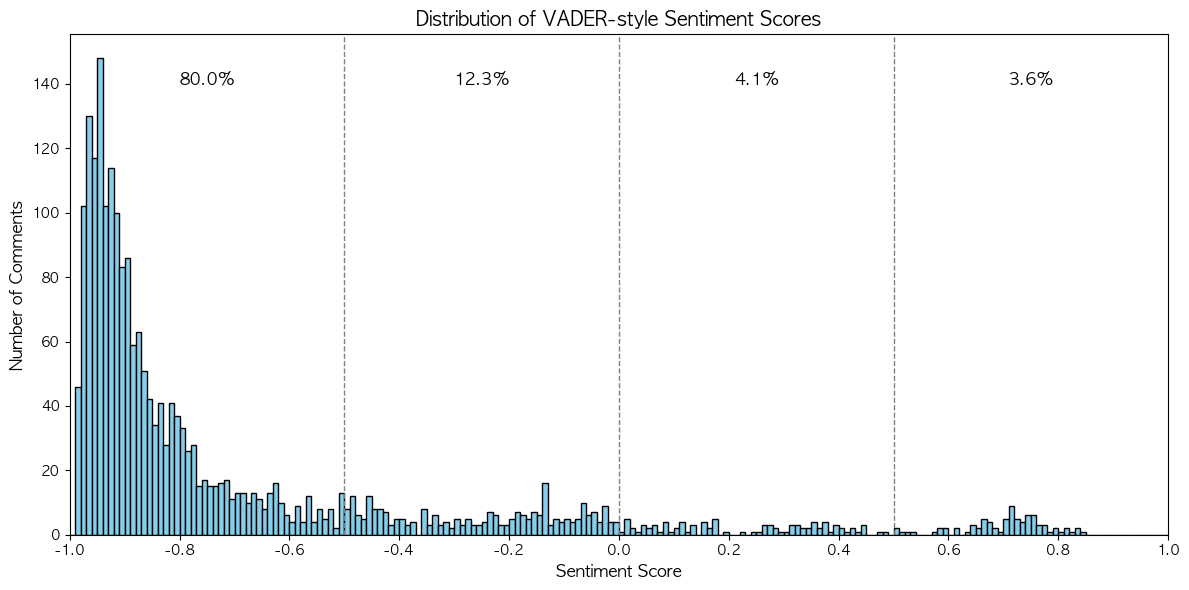

In [147]:
# NaN Ï†úÍ±∞Ìïú vader_score Ï∂îÏ∂ú
vader_scores = df_tariff['vader_score'].dropna()

# 0.01 Í∞ÑÍ≤© Íµ¨Í∞Ñ ÏÑ§Ï†ï
bins = np.arange(-1.0, 1.01, 0.01)

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
plt.hist(vader_scores, bins=bins, color='skyblue', edgecolor='black')

# Í∏∞Ï§ÄÏÑ† ÌëúÏãú: -0.5, 0, 0.5
for x in [-0.5, 0, 0.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Ï†ÑÏ≤¥ Ïàò
total = len(vader_scores)

# Í∞Å Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
ranges = [(-1.0, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 1.0)]
positions = [-0.75, -0.25, 0.25, 0.75]
labels = []

for (low, high) in ranges:
    count = vader_scores[(vader_scores > low) & (vader_scores <= high)].count()
    percent = count / total * 100
    labels.append(f"{percent:.1f}%")

# ÏÉÅÎã®Ïóê ÎπÑÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
y_max = plt.ylim()[1]
for x, label in zip(positions, labels):
    plt.text(x, y_max * 0.9, label, ha='center', fontsize=12, color='black')

# ÏãúÍ∞ÅÌôî ÏÑ∏Î∂Ä ÏÑ§Ï†ï
plt.title("Distribution of VADER-style Sentiment Scores", fontsize=14)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.grid(False)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()

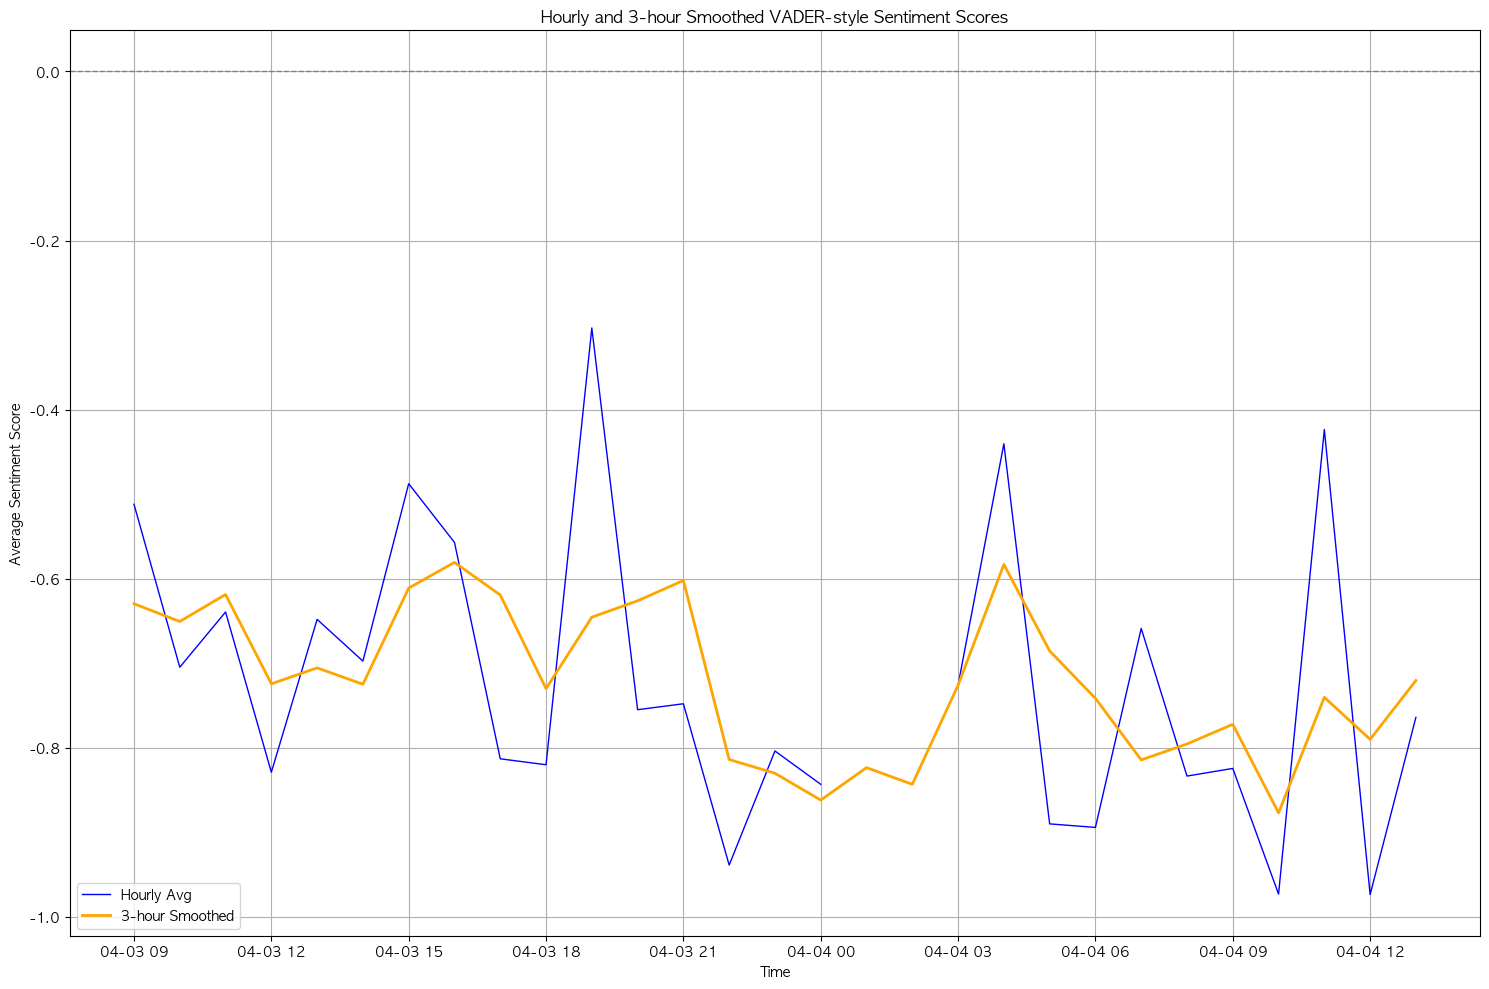

In [159]:
# 1. Ïà´ÏûêÌòï Ïó¥Îßå ÏÑ†ÌÉùÌïòÏó¨ Î¶¨ÏÉòÌîåÎßÅ
numeric_cols = ['like_count', 'sentiment_score', 'sentiment_numeric', 'vader_score']
df_numeric = df_tariff[numeric_cols + ['published_at']]

# 2. Î¶¨ÏÉòÌîåÎßÅ ÏàòÌñâ
df_hourly = df_numeric.set_index('published_at').resample('1h').mean()

# 3. 3ÏãúÍ∞Ñ Ïù¥Îèô ÌèâÍ∑† Í≥ÑÏÇ∞
df_hourly['smoothed'] = df_hourly['vader_score'].rolling(window=3, min_periods=1).mean()

# ÌÉÄÏûÑÏ°¥ ÎßûÏ∂îÍ∏∞ (UTC)
start_time = pd.to_datetime('2025-04-03 09:00:00', utc=True)
end_time = pd.to_datetime('2025-04-04 13:00:00', utc=True)

# ÏãúÍ∞Ñ ÌïÑÌÑ∞ÎßÅ
df_plot = df_hourly.loc[start_time:end_time]

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 10))
plt.plot(df_plot.index, df_plot['vader_score'], color='blue', linewidth=1, label='Hourly Avg')
plt.plot(df_plot.index, df_plot['smoothed'], color='orange', linewidth=2, label='3-hour Smoothed')

# Í∏∞Ï§ÄÏÑ†
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# ÎßàÎ¨¥Î¶¨ ÏÑ§Ï†ï
plt.title("Hourly and 3-hour Smoothed VADER-style Sentiment Scores")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt
from tqdm.notebook import tqdm
import pandas as pd

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï†ïÏùò
okt = Okt()

# ÌïúÍ∏ÄÎßå Ï∂îÏ∂ú + Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ Ï§ëÏã¨
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ
tqdm.pandas()
df_tariff['clean_text'] = df_tariff['text'].progress_apply(preprocess)

# TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_tariff['clean_text'])

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: 5Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
kmeans = KMeans(n_clusters=5, random_state=42)
df_tariff['cluster'] = kmeans.fit_predict(X)

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.1/11.1 MB 9.1 MB/s eta 0:00:0000:010:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22.4/22.4 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4/4 [scikit-learn] [scikit-learn]


  0%|          | 0/2249 [00:00<?, ?it/s]

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [167]:
# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: 5Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
kmeans = KMeans(n_clusters=3, random_state=42)
df_tariff['cluster'] = kmeans.fit_predict(X)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [169]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥ Î≥¥Í∏∞
def get_top_keywords(cluster_num, n_terms=10):
    centroids = kmeans.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# ÏòàÏãú: ÌÅ¥Îü¨Ïä§ÌÑ∞ 0~4Ïùò ÌïµÏã¨ Îã®Ïñ¥
for i in range(3):
    print(f"\nüîπ Cluster {i} top keywords:")
    print(get_top_keywords(i))


üîπ Cluster 0 top keywords:
['Í¥ÄÏÑ∏', 'Ìä∏ÎüºÌîÑ', 'Ï§ëÍµ≠', 'ÌïúÍµ≠', 'Ïö∞Î¶¨', 'ÎÇòÎùº', 'Í≥ÑÎûÄ', 'ÏÑ±Ï°∞Í∏∞', 'ÏùºÎ≥∏', 'Íµ≠Í∞Ä']

üîπ Cluster 1 top keywords:
['ÎØ∏Íµ≠', 'Í¥ÄÏÑ∏', 'ÌïúÍµ≠', 'Ïö∞Î¶¨', 'Ï§ëÍµ≠', 'Ìä∏ÎüºÌîÑ', 'ÏàòÏ∂ú', 'ÎÇòÎùº', 'ÏÑ∏Í≥Ñ', 'Ïù¥Ï†ú']

üîπ Cluster 2 top keywords:
['ÎåÄÌÜµÎ†π', 'ÎÇòÎùº', 'ÎØ∏Íµ≠', 'ÌÉÑÌïµ', 'Ìä∏ÎüºÌîÑ', 'Ïö∞Î¶¨', 'Ï§ëÍµ≠', 'ÌòëÏÉÅ', 'ÏßÄÍ∏à', 'ÌïúÍµ≠']


In [171]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú ÏòàÏãú ÎåìÍ∏Ä 3Í∞úÏî©
for i in range(3):
    print(f"\n=== Cluster {i} ===")
    samples = df_tariff[df_tariff['cluster'] == i]['text'].dropna().sample(3, random_state=42)
    for comment in samples:
        print("-", comment)


=== Cluster 0 ===
- Í∑πÏö∞ÎÑòÎì§ Ìä∏ÎüºÌîÑÌïúÌÖå Îí§ÌÜµÏàò ÎßûÏúºÎãà Ïñ¥Îñ†ÎÉê?
- Ìä∏ÎüºÌîÑ ÏûÑÍ∏∞ÎÅùÎÇòÎ©¥ Í∑∏Ïù¥ÌõÑÏóêÎäî Ïñ¥ÎñªÍ≤å Î≥ÄÌï†Ïàò ÏûàÏùÑÏßÄ Î™®Î•∏Îã§ ÎØ∏Íµ≠Ïóê Ìà¨ÏûêÌï¥ÏÑú Ï§ëÍµ≠Ïóê Ìà¨ÏûêÌïòÎäîÍ±∞ÎÇò Îã§Î•ºÎ∞îÏóÜÎã§
- Í∑πÏö∞Îì§ÏïÑ!!!~~<br>ÎØ∏Íµ≠Ïù¥ Ïö∞Î∞© ÎèôÎßπÏù∏Îç∞ 26% Í¥ÄÏÑ∏ÎùºÎãà FTAÎèÑ ÏóÜÎçòÍ±∏Î°úÌïòÍ≥†   Ïù¥Îü¥ÏàòÍ∞Ä ÏûàÎÇòÏöî??? Í∑πÏö∞Îì§ÏïÑ ÏÑ±Ï°∞Í∏∞Î•º ÌùîÎì§Ïñ¥ ÏáºÌïòÎ©¥ÏÑú Ï†ïÏπòÏóê Ïù¥Ïö©ÌïúÍ≤ÉÏùÑ Ìä∏ÎüºÌîÑÍ∞Ä Í¥¥Ïî∏ÌïòÍ≤å ÏïåÍ≥† Í¥ÄÏÑ∏Ìè≠Îã® ÎïåÎ†∏Îã§ Í∑πÏö∞ ÎãàÎì§ÏùÄ ÎÇòÎùºÏóê ÎèÑÏõÄÏù¥ ÏïàÎêòÏöî? ÎèôÎßπÏù¥Î©¥ 10% ÏÉÅÌò∏Í¥ÄÏÑ∏ Ìï¥ÏïºÏßÄ !~~~

=== Cluster 1 ===
- Ïö∞Î¶∞ ÎØ∏Íµ≠ÏÇ∞Ïóê ÎπÑÍ¥ÄÏÑ∏ Ìï¥Îùº
- ÎØ∏Íµ≠ÏûêÎèôÏ∞®Îäî ÎØ∏Íµ≠ÏóêÏÑú 90%  ÏÉùÏÇ∞ ÌïòÎäîÎç∞ Ïù¥Í≤å Î¨¥Ïä® ÎÖºÎ¶¨Ïïº  ÏõÉÍ∏∞ÎÑ§~~
- @@donghyunkim3999Ïù∏Ï†ïÌï©ÎãàÎã§ Î¨¥Ïä® ÎØ∏Íµ≠Ïù¥ ÏàòÏ∂úÏùÑ ÏïàÌïòÎ©¥ Í∑∏Îßå Ïù¥Îü¨Í≥†ÏûàÎÑ§Ïöî Í∑∏ÎÉ• ÎßâÎ¨¥Í∞ÄÎÇ¥Î°ú ÎßêÌïúÎã§Í≥† ÎêòÎäîÍ≤ÉÏù¥„ÖúÏïÑÎãåÎç∞

=== Cluster 2 ===
- Ìä∏ÎüºÌîÑ ÏûÖÏû•ÏóêÏÑ† <br>ÌïúÍµ≠ ÎëêÎì§Í≤® Ìå®Í∏∞Ïóî ÏßÄÍ∏àÏù¥ Îî±Ïù¥ÏßÄ.<br>ÎåÄÌÜµÎ†πÎ

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


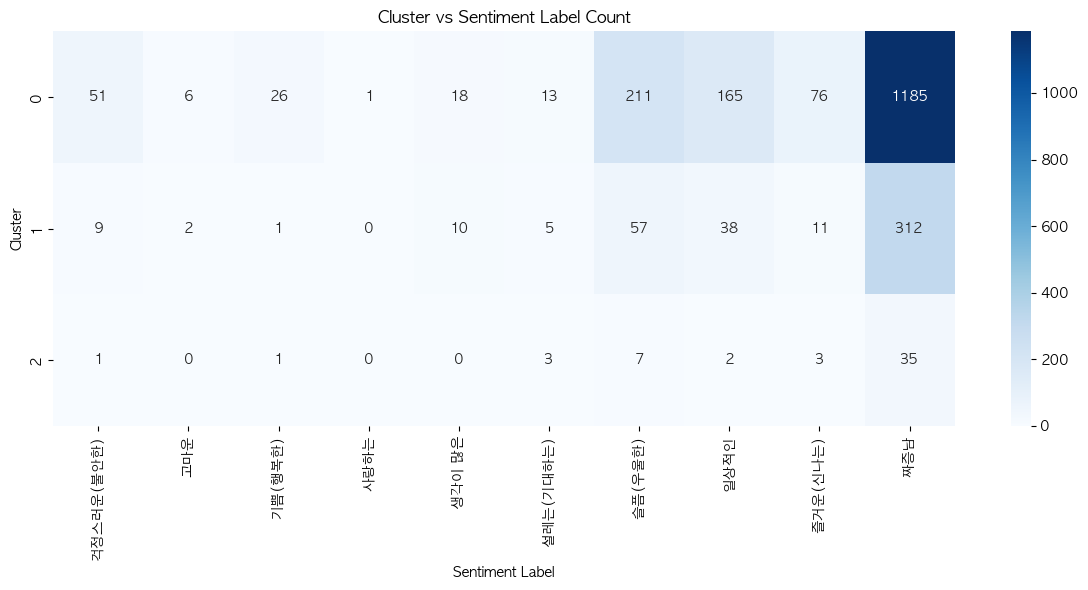

In [175]:
!pip install seaborn
# Ïú†Ìö®Ìïú sentiment_labelÎßå ÏÇ¨Ïö©
valid_df = df_tariff[df_tariff['sentiment_label'].notna()]
valid_df = valid_df[valid_df['sentiment_label'] != 'error']

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab = pd.crosstab(valid_df['cluster'], valid_df['sentiment_label'])

# Î≥¥Í∏∞ Ï¢ãÍ≤å ÌëúÏãú
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster vs Sentiment Label Count")
plt.xlabel("Sentiment Label")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [177]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ Í∞êÏ†ï Î†àÏù¥Î∏î Ï∂îÏ∂ú
dominant_sentiments = cross_tab.idxmax(axis=1)
dominant_counts = cross_tab.max(axis=1)

# ÏöîÏïΩ Ìëú
cluster_summary = pd.DataFrame({
    "Dominant Sentiment": dominant_sentiments,
    "Count": dominant_counts
})
display(cluster_summary)

Dominant Sentiment  Count
cluster                          
0                      ÏßúÏ¶ùÎÇ®   1185
1                      ÏßúÏ¶ùÎÇ®    312
2                      ÏßúÏ¶ùÎÇ®     35

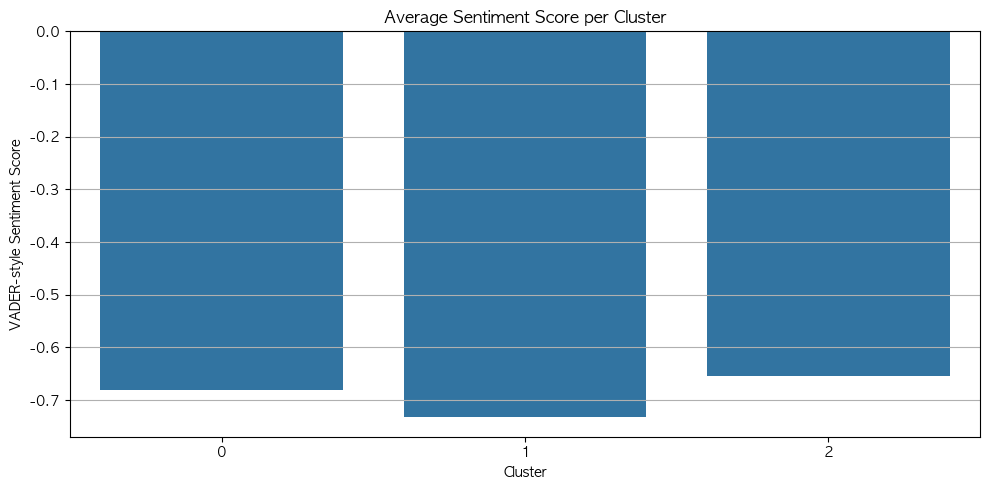

Cluster  Avg Sentiment Score   Std Dev  Count
0        0            -0.680672  0.420106   1752
1        1            -0.732723  0.341108    445
2        2            -0.654450  0.511714     52

In [179]:
# Ïú†Ìö®Ìïú vader_scoreÎßå ÏÇ¨Ïö©
valid_scores = df_tariff[['cluster', 'vader_score']].dropna()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
cluster_sentiment_stats = valid_scores.groupby('cluster')['vader_score'].agg(['mean', 'std', 'count']).reset_index()
cluster_sentiment_stats.columns = ['Cluster', 'Avg Sentiment Score', 'Std Dev', 'Count']

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_sentiment_stats, x='Cluster', y='Avg Sentiment Score')
plt.title("Average Sentiment Score per Cluster")
plt.ylabel("VADER-style Sentiment Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# ÌÜµÍ≥ÑÌëúÎèÑ Ìï®Íªò Ï∂úÎ†•
display(cluster_sentiment_stats)

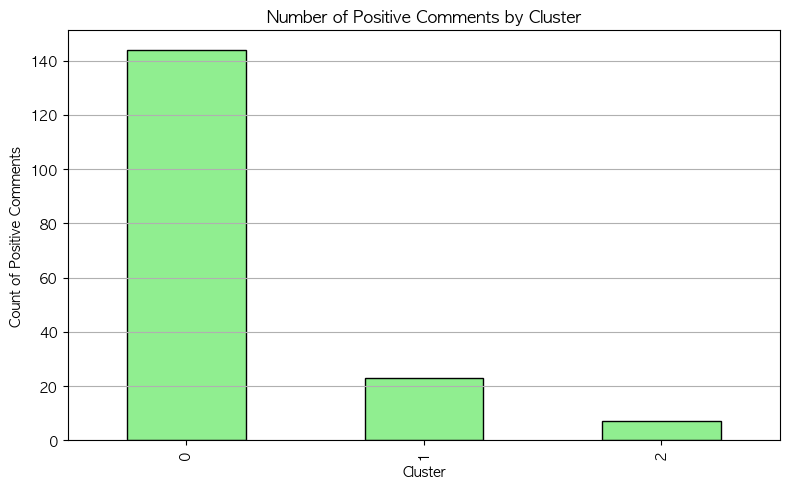

Cluster  Positive Count
0        0             144
1        1              23
2        2               7

In [183]:
# Í∏çÏ†ï ÎåìÍ∏Ä ÌïÑÌÑ∞ÎßÅ
positive_df = df_tariff[df_tariff['vader_score'] > 0]

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏çÏ†ï ÎåìÍ∏Ä Ïàò ÏßëÍ≥Ñ
positive_counts = positive_df['cluster'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
positive_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Number of Positive Comments by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Positive Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
positive_counts_df = positive_counts.reset_index()
positive_counts_df.columns = ['Cluster', 'Positive Count']
display(positive_counts_df)

In [185]:
# 1. Í∏çÏ†ï ÎåìÍ∏ÄÎßå Ï∂îÏ∂ú
positive_df = df_tariff[df_tariff['vader_score'] > 0].copy()

# 2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÏÑ§Ï†ï
okt = Okt()

# 3. ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Î™ÖÏÇ¨ Ï∂îÏ∂ú)
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 4. Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
tqdm.pandas()
positive_df['clean_text'] = positive_df['text'].progress_apply(preprocess)

# 5. TF-IDF Î≤°ÌÑ∞Ìôî (ÏÉÅÏúÑ 1000Í∞ú Îã®Ïñ¥ Í∏∞Ï§Ä)
vectorizer_pos = TfidfVectorizer(max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_text'])

  0%|          | 0/174 [00:00<?, ?it/s]

In [187]:
# 6. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: 4Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
kmeans_pos = KMeans(n_clusters=2, random_state=42)
positive_df['cluster'] = kmeans_pos.fit_predict(X_pos)

In [189]:
def get_top_keywords_pos(cluster_num, n_terms=10):
    centroids = kmeans_pos.cluster_centers_
    terms = vectorizer_pos.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# ÏòàÏãú: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌïµÏã¨ Îã®Ïñ¥
for i in range(2):
    print(f"\nüîπ Cluster {i} Top Keywords:")
    print(get_top_keywords_pos(i))


üîπ Cluster 0 Top Keywords:
['ÎØ∏Íµ≠', 'Ìä∏ÎüºÌîÑ', 'Í¥ÄÏÑ∏', 'ÎåÄÌÜµÎ†π', 'ÌïúÍµ≠', 'ÌôîÏù¥ÌåÖ', 'Ïö∞Î¶¨', 'ÏµúÏÉÅ', 'ÌïúÎØ∏', 'ÎìúÍ∞ÄÏûê']

üîπ Cluster 1 Top Keywords:
['Ï§ëÍµ≠', 'ÎØ∏Íµ≠', 'ÏùºÎ≥∏', 'Îü¨ÏãúÏïÑ', 'Ïö∞Î¶¨', 'Í∏∞Ï°¥', 'Î∞òÏÇ¨', 'Ïù¥Îìù', 'ÌïúÍµ≠', 'Í∏∞Ìöå']


In [191]:
for i in [0, 1]:
    print(f"\nüîπ Cluster {i} ÎåÄÌëú ÎåìÍ∏Ä:")
    comments = positive_df[positive_df['cluster'] == i]['text'].dropna()
    n_samples = min(3, len(comments))  # ÎåìÍ∏ÄÏù¥ 3Í∞ú ÎØ∏ÎßåÏù¥Î©¥ ÏûàÎäî ÎßåÌÅºÎßå
    if n_samples > 0:
        sample_comments = comments.sample(n_samples, random_state=42)
        for idx, comment in enumerate(sample_comments, start=1):
            print(f"{idx}. {comment}")
    else:
        print("‚ùó Ïù¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÎäî ÎåìÍ∏ÄÏù¥ ÏóÜÏäµÎãàÎã§.")


üîπ Cluster 0 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÌèâÌÉù ÎØ∏Íµ∞Í∏∞ÏßÄÎäî ÎØ∏Íµ≠ÎïÖÏúºÎ°ú ÎêòÏñ¥ÏûàÍ≥† Ï£ºÏÜåÎèÑ ÎØ∏Íµ≠ÏúºÎ°ú ÎêòÏñ¥ÏûàÏûîÏïÑ~Í±∞Í∏∞Îã§Í∞Ä ÏûêÎèôÏ∞®Í≥µÏû•ÏßÄÏñ¥ÏÑú ÎØ∏Íµ≠Î≥∏ÌÜ†Î°ú ÏàòÏ∂úÎ≥¥ÎÇ¥Î©¥ Í¥ÄÏÑ∏ 0ÏõêÏù¥Îã§! Ï∂îÏßÑÍ∞ÄÏ¶àÏïÑ!üòÇ
2. Ïö∞Î¶¨ÎÇòÎùº Í≤ÅÎÇò Ïª∑ÎÑ§ „Öã„Öã„Öã ÎØ∏Íµ≠Ïù¥ Îß§Î≤à Ï≤´Î≤àÏß∏Î°ú Ïñ∏Í∏âÌïòÎäî Î∂ÄÏûêÎÇòÎùº„Öã„Öã„Öã„Öã ÌïúÍµ≠,ÏùºÎ≥∏„Öã„Öã„Öã
3. ÏïÑÏ£º Îü¨Î∏îÎ¶¨ÌïòÍµ∞

üîπ Cluster 1 ÎåÄÌëú ÎåìÍ∏Ä:
1. Îâ¥Ïä§  ÏßÑÏßú üëç üòÇüòÇüòÇüòÇüòÇ  Ïñ¥Ï†ú Ï§ëÍµ≠   Ïò§Îäò ÎØ∏Íµ≠  üòÖüòÖüòÖüòÖüòÖ
2. Í∑∏Î†áÎã§Í≥† Ï§ëÍµ≠Ïù¥Îûë ÏéºÏéºÌï†ÏàúÏóÜÏûñÏïÑ? Ï§ëÍµ≠Ïù¥Îûë ÏπúÍµ¨ÌïòÏã§Î∂Ñ?
3. Ï§ëÍµ≠Í≥º Ìûò Ìï©ÏπúÎã§ „ÖÖ„Ñ±<br>„Öã„Öã„Öã„Öã„Öã„Öã„Öã


In [193]:
# 1. Í∏çÏ†ï ÎåìÍ∏Ä ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏
positive_texts = positive_df['text'].dropna().tolist()

# 2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# 3. Î™ÖÏÇ¨Îßå Ï∂îÏ∂úÌïòÏó¨ Ïπ¥Ïö¥ÌåÖ
word_counter = Counter()
for text in positive_texts:
    try:
        nouns = okt.nouns(text)
        word_counter.update(nouns)
    except:
        continue

# 4. Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ 20Í∞ú Ï∂îÏ∂ú
top_words = word_counter.most_common(20)

# 5. Ï∂úÎ†•
print("üìä Top 20 Most Common Words in Positive Comments:")
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i}. {word} - {count}Ìöå")

üìä Top 20 Most Common Words in Positive Comments:
1. ÎØ∏Íµ≠ - 37Ìöå
2. Ìä∏ÎüºÌîÑ - 21Ìöå
3. Ï§ëÍµ≠ - 18Ìöå
4. Í¥ÄÏÑ∏ - 15Ìöå
5. ÌïúÍµ≠ - 14Ìöå
6. Í≤É - 14Ìöå
7. Ïö∞Î¶¨ - 13Ìöå
8. ÎåÄÌÜµÎ†π - 9Ìöå
9. Ïàò - 8Ìöå
10. Îçî - 7Ìöå
11. ÏùºÎ≥∏ - 7Ìöå
12. Îã§Ïãú - 6Ìöå
13. ÎßåÏÑ∏ - 6Ìöå
14. Ïö∞Î¶¨ÎÇòÎùº - 6Ìöå
15. ÏàòÏ∂ú - 6Ìöå
16. ÎÇòÎùº - 5Ìöå
17. Ïù¥Ï†ú - 5Ìöå
18. ÎåÄÌïúÎØºÍµ≠ - 5Ìöå
19. ÌôîÏù¥ÌåÖ - 5Ìöå
20. ÏµúÏÉÅ - 5Ìöå


In [197]:
# 1. Î∂ÄÏ†ï ÎåìÍ∏ÄÎßå Ï∂îÏ∂ú
negative_df = df_tariff[df_tariff['vader_score'] < 0].copy()

# 2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# 3. Î™ÖÏÇ¨ Ï§ëÏã¨ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 4. Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
tqdm.pandas()
negative_df['clean_text'] = negative_df['text'].progress_apply(preprocess)

# 5. TF-IDF Î≤°ÌÑ∞Ìôî (Îã®Ïñ¥ Ïàò Ï†úÌïú Í∞ÄÎä•)
vectorizer_neg = TfidfVectorizer(max_features=1000)
X_neg = vectorizer_neg.fit_transform(negative_df['clean_text'])

  0%|          | 0/2075 [00:00<?, ?it/s]

In [199]:
kmeans_neg = KMeans(n_clusters=2, random_state=42)
negative_df['cluster'] = kmeans_neg.fit_predict(X_neg)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [201]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ Îã®Ïñ¥ Î≥¥Í∏∞
def get_top_keywords_neg(cluster_num, n_terms=10):
    centroids = kmeans_neg.cluster_centers_
    terms = vectorizer_neg.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# Ï∂úÎ†•: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉÅÏúÑ Îã®Ïñ¥
for i in range(kmeans_neg.n_clusters):
    print(f"\nüîπ Cluster {i} ÎåÄÌëú ÌÇ§ÏõåÎìú:")
    print(", ".join(get_top_keywords_neg(i)))


üîπ Cluster 0 ÎåÄÌëú ÌÇ§ÏõåÎìú:
Ìä∏ÎüºÌîÑ, Í¥ÄÏÑ∏, Ï§ëÍµ≠, ÌïúÍµ≠, ÎÇòÎùº, Ïö∞Î¶¨, Í≥ÑÎûÄ, ÏÑ±Ï°∞Í∏∞, Íµ≠Í∞Ä, Í∑∏ÎÉ•

üîπ Cluster 1 ÎåÄÌëú ÌÇ§ÏõåÎìú:
ÎØ∏Íµ≠, Í¥ÄÏÑ∏, ÌïúÍµ≠, Ï§ëÍµ≠, Ïö∞Î¶¨, Ìä∏ÎüºÌîÑ, ÏàòÏ∂ú, ÎÇòÎùº, ÏÑ∏Í≥Ñ, Ïù¥Ï†ú


In [203]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÎåìÍ∏Ä ÏÉòÌîå
for i in range(kmeans_neg.n_clusters):
    print(f"\nüîª Cluster {i} ÎåÄÌëú ÎåìÍ∏Ä:")
    comments = negative_df[negative_df['cluster'] == i]['text'].dropna()
    n_samples = min(3, len(comments))  # ÎåìÍ∏Ä ÏàòÍ∞Ä Ï†ÅÏùÑ Í≤ΩÏö∞ ÏòàÏô∏ Î∞©ÏßÄ
    if n_samples > 0:
        samples = comments.sample(n_samples, random_state=42)
        for idx, comment in enumerate(samples, 1):
            print(f"{idx}. {comment}")
    else:
        print("‚ùó ÎåìÍ∏Ä ÏóÜÏùå")


üîª Cluster 0 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÏùºÎ∞©Ï†ÅÏù∏ ÏÇ¨ÏïàÏù¥Îã§.Íµ≠ÎØºÎì§ ÎåÄÎã§ÏàòÍ∞Ä Ïù¥Îü¨Ìïú Ïú†ÌòïÏùò Î∂àÏïàÍ∞êÏù¥ ÏûàÏóàÎã§. Ï§ÄÎπÑÎäî ÌñàÍ≤†ÏßÄÏöî.ÎàÑÍµ¨ÎÇò ÎãπÌïòÍ≥†Îßå ÏûàÏßÄ ÏïäÎäîÎã§.Î∞©ÏúÑÏÇ∞ÏóÖÎèÑ ÏûêÍµ≠ÏóêÏÑú ÏûêÎûëÏßàÏùÑ ÌïòÎäîÎÜà,Îπ†ÎäîÎÜàÎì§ÎèÑ Ïù¥Ìï¥Î∂àÍ∞ÄÎã§.ÎØ∏Íµ≠Î™´ÏùÑ  ÎπºÏïóÎäîÎã§Í≥† ÏÉùÍ∞ÅÌïòÍ≤†Îã§.Ïã†Ï§ëÌïòÍ≤å Ï≤òÏã†ÌïòÏûê.
2. ÏïÑÏïÑÏïÑ„Ö†„Ö† Ìä∏ÌÜµÎãò Ïö∞Î¶¨Ï¢Ä ÍπçÏïÑÏ•¨ÏÑ∏ÏöîÏò§
3. „Öé„Öé„Öé ÌòÑÎåÄ Ìà¨ÏûêÌñàÎã§Î©î  ÏóêÌú¥ „ÖÇ„ÖÖÎì§

üîª Cluster 1 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÎØ∏Íµ≠Ïù¥ Í¥ÄÏÑ∏ Ïò¨Î†∏ÎìØÌûà Ïö∞Î¶¨ÎèÑ Íµ¨Í∏ÄÏù¥ 12Ï°∞Î≤åÎ©¥ÏÑú ÎßùvpnÍ¥ÄÏÑ∏ 0ÏòÅÎÇ¥Í≥† ÎèàÏ≤¥ÎÇ©ÌñàÏúºÎãà ÎØ∏Íµ≠ Î≤ïÎåÄÎ°ú 33ÌîÑÎ°úÏóê Ï≤¥ÎÇ©Ïù¥ÏûêÍπåÏßÄ 7Ï°∞Î∞õÏïÑÎÇ¥Ïûêüòäüòäüòäüòä
2. ÌïµÎ¨¥Í∏∞ ÎßåÎì§Í≥† ÌïúÏ§ëÏùºÎü¨Ïù∏ÎèÑ,ÏïÑÏÑ∏ÏïÑ Îì± Î™®Îëê Î¨¥Í¥ÄÏÑ∏ Ï°¥ ÎßåÎì§Ïñ¥ÏÑú ÎØ∏Íµ≠ ÏôïÎî∞ ÏãúÏºúÎ≤ÑÎ¶¨Ïûê
3. Ï†úÏ°∞ÏóÖ Îã§ ÎØ∏Íµ≠ÏúºÎ°ú Îπ†ÏßÄÍ≤†ÎÑ§


In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)


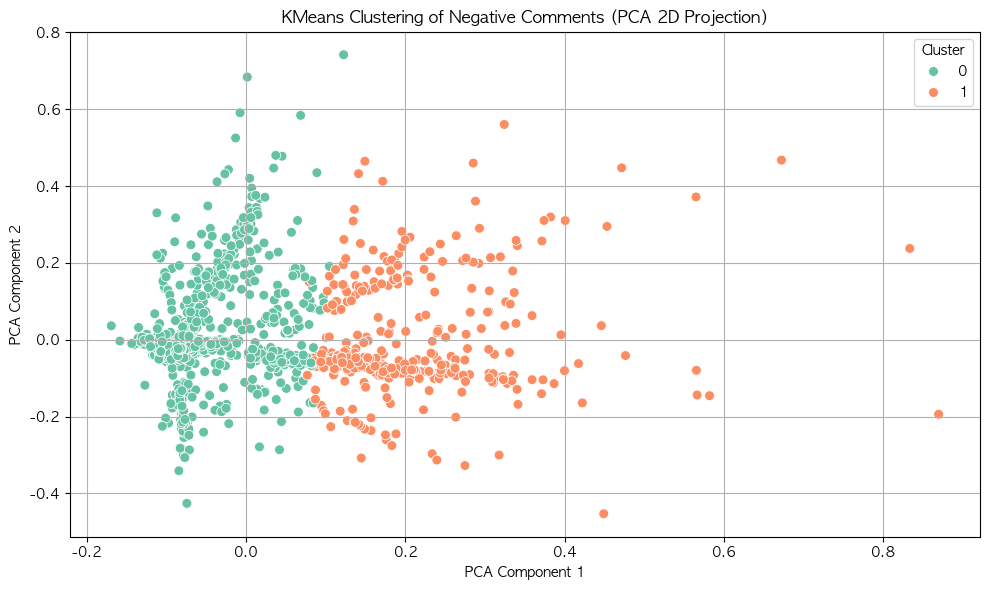

In [207]:
# PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå (2D)
pca = PCA(n_components=2, random_state=42)
X_neg_2d = pca.fit_transform(X_neg.toarray())  # X_negÏùÄ TF-IDF ÌñâÎ†¨

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î¨∂Í∏∞
viz_df = pd.DataFrame({
    'PCA1': X_neg_2d[:, 0],
    'PCA2': X_neg_2d[:, 1],
    'cluster': negative_df['cluster']
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.scatterplot(data=viz_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=50)
plt.title("KMeans Clustering of Negative Comments (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [211]:
# 'Ï§ëÍµ≠'Ïù¥ÎùºÎäî Îã®Ïñ¥Í∞Ä Ìè¨Ìï®Îêú ÎåìÍ∏ÄÎßå Ï∂îÏ∂ú (Í≤∞Ï∏° Ï†úÍ±∞ Ìè¨Ìï®)
china_df = df_tariff[df_tariff['text'].str.contains('Ï§ëÍµ≠', na=False)].copy()

# Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
print(f"üîç 'Ï§ëÍµ≠' Ìè¨Ìï® ÎåìÍ∏Ä Ïàò: {len(china_df)}")
china_df[['text', 'vader_score']].head()

üîç 'Ï§ëÍµ≠' Ìè¨Ìï® ÎåìÍ∏Ä Ïàò: 214


text  \
12                        Í∑∏Îüº Ï§ëÍµ≠ÌïúÌÖåÏò¨Ïù∏Ìï¥ Ï§ëÍµ≠ÏÇ∞ ÏãùÌíà Ï†ÑÏûêÏ†úÌíà Îã§ ÏàòÏûÖÌïòÍ≥† „Öã„Öã„Öã„Öã„Öã„Öã 1Ï∞çÏùÄ Ï¢ÖÎÇòÍ≤å ÌïòÎ©¥ÏÑú Îòê Í∑∏Í±¥Ïã´Ïñ¥ÌïòÎçîÎùº   
14  Ïö∞Î¶¨ÎÇòÎùºÎèÑ Ï∫êÎÇòÎã§Ï≤òÎüº ÎØ∏Íµ≠Í≥º ÎßûÎåÄÏùëÌïòÏûê ÎßêÏù¥ Ïö∞Î∞©Íµ≠ Ïù¥ÏßÄ ÏôÑÏ†ÑÌûà Íπ°Ìå®Ïïº Íπ°Ìå® Ï§ëÍµ≠ÎèÑ Íπ°Ìå®Í≥† ÎØ∏Íµ≠ÎèÑ Íπ°Ìå®Í≥† Ïù¥ Íπ°Ìå® Îëê ÎÇòÎûòÎ•º ÏßÄÍµ¨ÏóêÏÑú ÏóÜÏñ¥Ï†∏ÏïºÎèº   
22                                                 ÎØºÏ£ºÎãπ Ï¢ãÏïÑÌïòÏãúÎäîÎ∂ÑÎì§ÏïÑ <br>Í∑∏Îüº ÎØ∏Íµ≠Î≥¥Îçî Ï§ëÍµ≠Ïù¥ Ï¢ãÏïÑÏöî?   
39                                                             ÎÇòÎùºÍ∞Ä Ï§ëÍµ≠Ïóê  ÎÑòÏñ¥Í∞îÏúºÎãà  Í∑∏Îü¨ÏßÄ Î≠ò   
53                                              Îâ¥Ïä§  ÏßÑÏßú üëç üòÇüòÇüòÇüòÇüòÇ  Ïñ¥Ï†ú Ï§ëÍµ≠   Ïò§Îäò ÎØ∏Íµ≠  üòÖüòÖüòÖüòÖüòÖ   

    vader_score  
12    -0.960780  
14    -0.978889  
22    -0.910696  
39    -0.930762  
53     0.502665

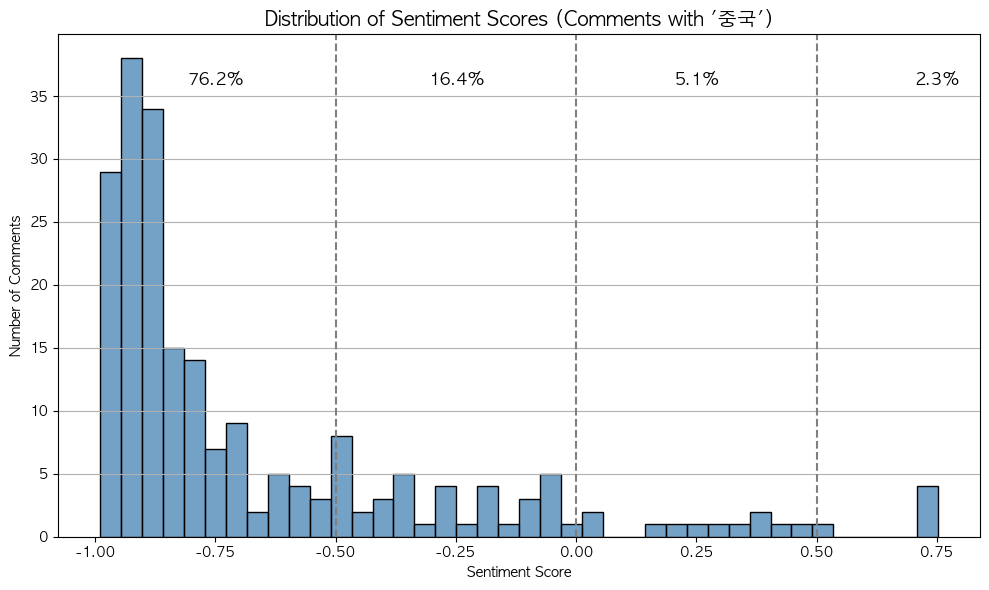

In [213]:
# 2. Ïú†Ìö®Ìïú Í∞êÏ†ï Ï†êÏàòÎßå ÌïÑÌÑ∞ÎßÅ
china_df = china_df[china_df['vader_score'].notnull()]

# 3. Í∞êÏ†ï Ï†êÏàò Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
bins = [-1.0, -0.5, 0.0, 0.5, 1.0]
labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
china_df['score_range'] = pd.cut(china_df['vader_score'], bins=bins, labels=labels, include_lowest=True)
range_counts = china_df['score_range'].value_counts(normalize=True).sort_index()

# 4. ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(china_df['vader_score'], bins=40, kde=False, color='steelblue', edgecolor='black')

# Ï†êÏÑ†Í≥º ÎùºÎ≤® Ï∂îÍ∞Ä
for x in [-0.5, 0, 0.5]:
    plt.axvline(x, color='gray', linestyle='--')

# ÎπÑÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for i, (label, pct) in enumerate(zip(range_counts.index, range_counts)):
    xpos = (bins[i] + bins[i+1]) / 2
    plt.text(xpos, plt.ylim()[1]*0.9, f"{pct:.1%}", ha='center', fontsize=12, fontweight='bold')

# ÏÑ§Ï†ï
plt.title("Distribution of Sentiment Scores (Comments with 'Ï§ëÍµ≠')", fontsize=14)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [219]:
# 1. ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏
china_texts = china_df['text'].dropna().tolist()

# 2. ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# 3. Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú ÌõÑ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
word_counter = Counter()

tqdm.pandas()  # ÏßÑÌñâÎ•† ÌëúÏãúÏö©
for text in tqdm(china_texts, desc="üìö Îã®Ïñ¥ Î∂ÑÏÑù Ï§ë"):
    try:
        nouns = okt.nouns(text)
        word_counter.update(nouns)
    except:
        continue

# 4. ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
top_words = word_counter.most_common(20)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä Top 20 Most Common Nouns in Comments with 'Ï§ëÍµ≠':")
for i, (word, count) in enumerate(top_words, start=1):
    print(f"{i}. {word} - {count}Ìöå")

üìö Îã®Ïñ¥ Î∂ÑÏÑù Ï§ë:   0%|          | 0/214 [00:00<?, ?it/s]

üìä Top 20 Most Common Nouns in Comments with 'Ï§ëÍµ≠':
1. Ï§ëÍµ≠ - 253Ìöå
2. ÎØ∏Íµ≠ - 149Ìöå
3. ÌïúÍµ≠ - 60Ìöå
4. Í¥ÄÏÑ∏ - 56Ìöå
5. ÎÇòÎùº - 31Ìöå
6. Îü¨ÏãúÏïÑ - 30Ìöå
7. ÏùºÎ≥∏ - 26Ìöå
8. Ïö∞Î¶¨ - 23Ìöå
9. Íµ≠Í∞Ä - 23Ìöå
10. Í≤É - 20Ìöå
11. Ìä∏ÎüºÌîÑ - 19Ìöå
12. Ïö∞Î¶¨ÎÇòÎùº - 17Ìöå
13. Ïú†ÎüΩ - 17Ìöå
14. ÏàòÏ∂ú - 16Ìöå
15. Í±∞ - 15Ìöå
16. ÏûÑ - 15Ìöå
17. ÎåÄÎßå - 14Ìöå
18. Îçî - 14Ìöå
19. Í≤ΩÏ†ú - 13Ìöå
20. Í≥µÏû• - 12Ìöå


In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÌÖçÏä§Ìä∏ Ï†ïÏ†ú)
okt = Okt()

def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# Ï†ÑÏ≤òÎ¶¨
china_df['clean_text'] = china_df['text'].apply(preprocess)

# 2. TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(max_features=1000)
X_media = vectorizer.fit_transform(china_df['clean_text'])

In [227]:
# 3. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (2Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
kmeans_china = KMeans(n_clusters=2, random_state=42)
china_df['cluster'] = kmeans_china.fit_predict(X_media)

In [229]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌïµÏã¨ ÌÇ§ÏõåÎìú Ìï®Ïàò
def get_top_keywords_media(cluster_num, n_terms=10):
    centroids = kmeans_china.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# Ï∂úÎ†•
for i in range(2):
    print(f"\nüîπ Cluster {i} Top Keywords:")
    print(", ".join(get_top_keywords_media(i)))


üîπ Cluster 0 Top Keywords:
Ï§ëÍµ≠, ÎØ∏Íµ≠, ÎÇòÎùº, Í¥ÄÏÑ∏, Ïö∞Î¶¨, Íµ≠Í∞Ä, Ìä∏ÎüºÌîÑ, ÏàòÏ∂ú, Îü¨ÏãúÏïÑ, Ïö∞Î¶¨ÎÇòÎùº

üîπ Cluster 1 Top Keywords:
ÌïúÍµ≠, Îü¨ÏãúÏïÑ, ÏùºÎ≥∏, Ï§ëÍµ≠, Ï§ëÍµ≠Ïù∏, Í¥ÄÏÑ∏, Ïù∏ÎèÑ, ÎåÄÎßå, Ïö∞Î¶¨, ÎØ∏Íµ≠


In [231]:
# ÎåÄÌëú ÎåìÍ∏Ä Ï∂úÎ†•
for i in range(2):
    print(f"\nüó£Ô∏è Cluster {i} ÎåÄÌëú ÎåìÍ∏Ä:")
    samples = china_df[china_df['cluster'] == i]['text'].dropna()
    n = min(3, len(samples))
    if n > 0:
        for idx, comment in enumerate(samples.sample(n, random_state=42), 1):
            print(f"{idx}. {comment}")
    else:
        print("‚ùó ÎåìÍ∏ÄÏù¥ ÏóÜÏäµÎãàÎã§.")


üó£Ô∏è Cluster 0 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÏßÑÏßú ÏûêÎèôÏúºÎ°ú Ï§ëÍµ≠Ïù¥Îûë Ïô∏ÍµêÌïòÎùºÍ≥†ÌïòÎÑ§ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã
2. Ï§ëÍµ≠ ÏùÄ  ÎØ∏Íµ≠Ïù¥ÏïÑÎãàÏïº Í∑∏ÎùºÌÉÄÍ≥† ÎØ∏Íµ≠ ÏùÄ Ï§ëÍµ≠ÏùÑ Ïù¥Í∏∞ÎÉê
3. ÏÇºÎã§Î¶¨ Ïô∏Íµê Ï†ïÏ±Ö..<br>ÎØ∏Íµ≠ Ï§ëÍµ≠ Ïú†ÎüΩ

üó£Ô∏è Cluster 1 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÌïúÍµ≠ÏùÄ Ï§ëÍµ≠Í≥º Í∞ôÎã§<br>250ÔºÖÎïåÎ†§Îùº
2. Î≠ê Îü¨ÏãúÏïÑÏ†ÑÏüÅÎèÑ ÎÅùÎÇòÏÑú Îü¨ÏãúÏïÑÌïòÍ≥† ÏÜêÏû°Í≥† Ïù¥Ï†úÎäî ÌïúÍµ≠ Ï§ëÍµ≠ ÏùºÎ≥∏ ÏïÑÏãúÏïÑ 3Í∞úÍµ≠ Í≤ΩÎç∞Ïó∞Ìï©ÎèÑ ÏÉùÍ∞ÅÌï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏùå ÏãúÏû•Ïù¥ ÎØ∏Íµ≠ÎßåÏûàÎäîÍ≤ÉÎèÑ ÏïÑÎãàÍ≥† Ï†ÄÎì§Ïù¥ Î®ºÏ†Ä Ïã†ÏùòÎ•º Ï†∏Î≤ÑÎ†∏ÏúºÎãà Ïö∞Î¶¨ÎèÑ ÏÇ¥ÏïÑÏïºÏßÄ~~ÏîÅÏì∏ÌïòÍµ¨Îßå
3. ÏãùÎØºÏßÄ ÌòÑÎåÄÎ≤ÑÏ†ÑÏù∏Í∞Ä „Ñ∑„Ñ∑ Ï§ëÍµ≠ ÏùºÎ≥∏ Îü¨ÏãúÏïÑÎ°ú Ï†ÑÌôò ÏïàÌïòÎ©¥ ÌïúÍµ≠ÏùÄ ÎÅùÎÇòÍ≤†ÎÑ§


In [233]:
# china ÎØ∏Ìè¨Ìï® ÎåìÍ∏Ä ÌïÑÌÑ∞ÎßÅ
non_china_df = df_tariff[~df_tariff['text'].str.contains('Ï§ëÍµ≠', na=False)].copy()

# ÌôïÏù∏
print(f"‚úÖ 'Ï§ëÍµ≠' ÎØ∏Ìè¨Ìï® ÎåìÍ∏Ä Ïàò: {len(non_china_df)}")

‚úÖ 'Ï§ëÍµ≠' ÎØ∏Ìè¨Ìï® ÎåìÍ∏Ä Ïàò: 2035


In [241]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Î™ÖÏÇ¨ Í∏∞Î∞ò)
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# Ï†ÑÏ≤òÎ¶¨
non_china_df['clean_text'] = non_china_df['text'].apply(preprocess)

# TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer_nonchina = TfidfVectorizer(max_features=1000)
X_nonchina = vectorizer_nonchina.fit_transform(non_china_df['clean_text'])

In [243]:
# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (3Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏòàÏãú)
kmeans_nonchina = KMeans(n_clusters=3, random_state=42)
non_china_df['cluster'] = kmeans_nonchina.fit_predict(X_nonchina)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [245]:
# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Ìï®Ïàò
def get_top_keywords_nonchina(cluster_num, n_terms=10):
    centroids = kmeans_nonchina.cluster_centers_
    terms = vectorizer_nonchina.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÇ§ÏõåÎìú
for i in range(3):
    print(f"\nüîπ Cluster {i} Top Keywords:")
    print(", ".join(get_top_keywords_nonchina(i)))

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÎåìÍ∏Ä
for i in range(3):
    print(f"\nüó£Ô∏è Cluster {i} ÎåÄÌëú ÎåìÍ∏Ä:")
    samples = non_china_df[non_china_df['cluster'] == i]['text'].dropna()
    n = min(3, len(samples))
    if n > 0:
        for idx, comment in enumerate(samples.sample(n, random_state=42), 1):
            print(f"{idx}. {comment}")
    else:
        print("‚ùó ÎåìÍ∏ÄÏù¥ ÏóÜÏäµÎãàÎã§.")


üîπ Cluster 0 Top Keywords:
Ìä∏ÎüºÌîÑ, Í¥ÄÏÑ∏, Ïö∞Î¶¨, ÎÇòÎùº, Í≥ÑÎûÄ, ÏÑ±Ï°∞Í∏∞, Í∑∏ÎÉ•, ÎåÄÌÜµÎ†π, ÏßÑÏßú, Ïö∞Î¶¨ÎÇòÎùº

üîπ Cluster 1 Top Keywords:
ÎØ∏Íµ≠, Í¥ÄÏÑ∏, Ïö∞Î¶¨, Ìä∏ÎüºÌîÑ, ÏàòÏ∂ú, ÏÑ∏Í≥Ñ, ÎÇòÎùº, Ïù¥Ï†ú, Ï†ÑÏÑ∏Í≥Ñ, Î∂àÎß§Ïö¥Îèô

üîπ Cluster 2 Top Keywords:
ÌïúÍµ≠, ÎØ∏Íµ≠, Í¥ÄÏÑ∏, ÏùºÎ≥∏, ÎåÄÌï¥, Ïù¥ÏÉÅ, Ìä∏ÎüºÌîÑ, ÎÇòÎùº, Ï†úÌíà, ÏàòÏ∂ú

üó£Ô∏è Cluster 0 ÎåÄÌëú ÎåìÍ∏Ä:
1. Î≥¥ÏàòÏö∞ÌååÎì§Ïù¥ ÎØøÎäî ÏòÅÏõêÌïú Ïö∞Î∞© ÎØ∏Íµ≠ „Öã„Öã„Öã ÏÑ±Ï°∞Í∏∞ ÌùîÎì§Ïñ¥Îùº Î≥¥ÏàòÏö∞ÌååÎì§ÏïÑ „Öã„Öã„Öã
2. Ïö∞Î¶¨ÎèÑ ÎåÄÏùë Í¥ÄÏÑ∏ Îß§Í≤®Ïïº Ìï®<br>Ìä∏ÎüºÌîÑÎäî Í∞ÄÎßåÌûà ÏûàÏúºÎ©¥ Îçî ÎßåÎßåÌïòÍ≤å Î≥¥Í∏∞ ÎïåÎ¨∏
3. ÌÉúÍ∑πÍ∏∞ ÏòÅÍ∞ÑÎãòÎì§   ...

üó£Ô∏è Cluster 1 ÎåÄÌëú ÎåìÍ∏Ä:
1. ÏÑ∏Í≥ÑÏ†ÅÏúºÎ°ú ÎØ∏Íµ≠ÏùÑ ÏÉÅÎåÄÎ°ú ÎòëÍ∞ôÏù¥ ÎåÄÌï¥Ï§òÏïºÌï®
2. ÎØ∏Íµ≠Ïóê Í±∞ÎåÄ Ìà¨ÏûêÌïòÏßÄÎßêÍ≥† Í¥ÄÏÑ∏Î¨ºÍ≥† Ìà¨ÏûêÍ∏àÏï° Î≥¥Ïú†ÌïòÎùº
3. ÎØ∏Íµ≠ÏàòÏ∂úÏùÄ ÌïòÏßÄ ÎßêÏûê.

üó£Ô∏è Cluster 2 ÎåÄÌëú ÎåìÍ∏Ä:
1. Í∑∏Í±¥ ÌïúÍµ≠Îøê ÏïÑÎãàÎùº ÏÑ†ÏßÑÍµ≠ Ï†ÑÏ≤¥ ÏñòÍ∏∞ÏûÑ ÎØ∏Íµ≠ÏùÄ Ï†úÏô∏
2. ÌïúÍµ≠ÎèÑ Ïä¨Ïä¨ Î≥¥Î≥µÌï† Ï∞®Î°

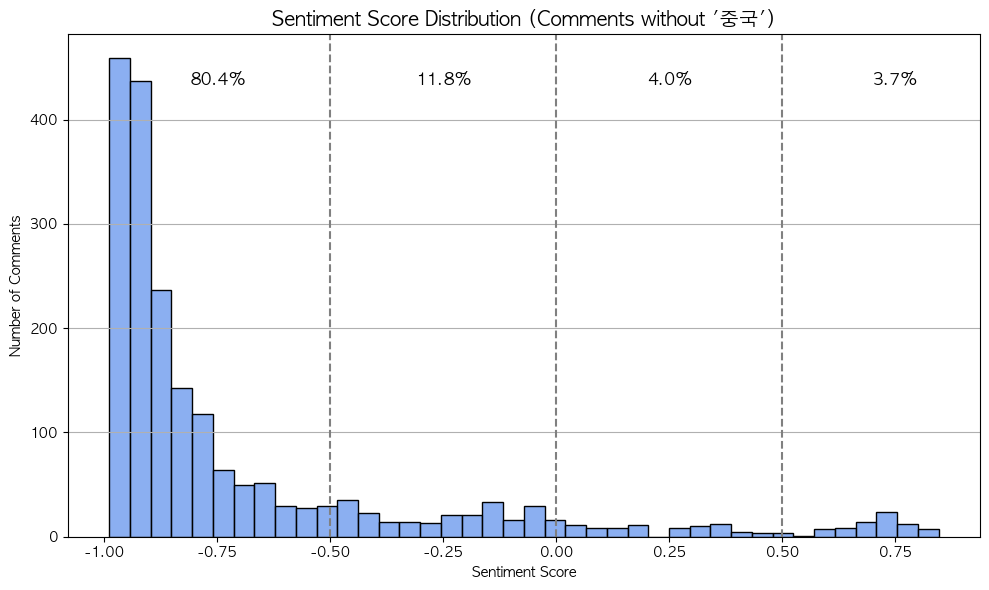

In [247]:
# 1. Ïú†Ìö®Ìïú vader_score ÌïÑÌÑ∞ÎßÅ
non_china_scores = non_china_df[non_china_df['vader_score'].notnull()].copy()

# 2. Í∞êÏ†ï Íµ¨Í∞Ñ ÎπÑÏú® Í≥ÑÏÇ∞
bins = [-1.0, -0.5, 0.0, 0.5, 1.0]
labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
non_china_scores['score_range'] = pd.cut(non_china_scores['vader_score'], bins=bins, labels=labels, include_lowest=True)
range_counts = non_china_scores['score_range'].value_counts(normalize=True).sort_index()

# 3. ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
sns.histplot(non_china_scores['vader_score'], bins=40, kde=False, color='cornflowerblue', edgecolor='black')

# Íµ¨Î∂ÑÏÑ† Í∑∏Î¶¨Í∏∞
for x in [-0.5, 0, 0.5]:
    plt.axvline(x, color='gray', linestyle='--')

# Í∞Å Íµ¨Í∞Ñ ÎπÑÏú® ÌÖçÏä§Ìä∏
for i, (label, pct) in enumerate(zip(range_counts.index, range_counts)):
    xpos = (bins[i] + bins[i+1]) / 2
    plt.text(xpos, plt.ylim()[1]*0.9, f"{pct:.1%}", ha='center', fontsize=12, fontweight='bold')

# ÏÑ§Ï†ï
plt.title("Sentiment Score Distribution (Comments without 'Ï§ëÍµ≠')", fontsize=14)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/var/folders/9g/4ckvsl7x1p34ttfd90yh0m0h0000gn/T/ipykernel_63510/276829802.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_stats, x='Cluster', y='Average Score', palette='Set2')


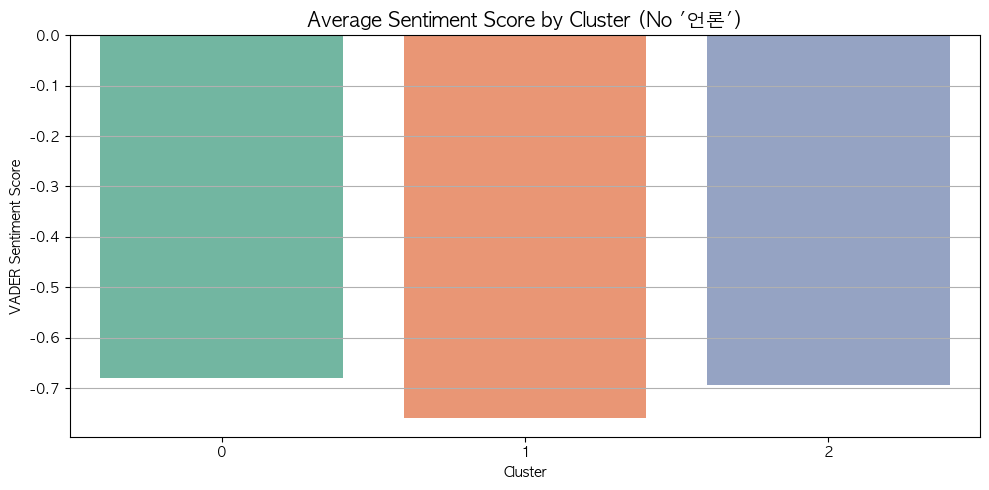

Cluster  Average Score   Std Dev  Count
0        0      -0.679476  0.430005   1565
1        1      -0.758758  0.318287    335
2        2      -0.693303  0.354275    135

In [249]:
# 1. Í∞êÏ†ï Ï†êÏàòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Îç∞Ïù¥ÌÑ∞Îßå
valid_cluster_scores = non_china_df[['cluster', 'vader_score']].dropna()

# 2. ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
cluster_stats = valid_cluster_scores.groupby('cluster')['vader_score'].agg(['mean', 'std', 'count']).reset_index()
cluster_stats.columns = ['Cluster', 'Average Score', 'Std Dev', 'Count']

# 3. ÌèâÍ∑† Ï†êÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_stats, x='Cluster', y='Average Score', palette='Set2')
plt.title("Average Sentiment Score by Cluster (No 'Ïñ∏Î°†')", fontsize=14)
plt.ylabel("VADER Sentiment Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 4. ÌÜµÍ≥ÑÌëú Ï∂úÎ†•
display(cluster_stats)